In [1]:
Create_Inputs = True
Run_MCMC = True

savefigs = True

#Site locations [lat,lon]
HarvardForest = [42.53415, -72.17147]
Chacaltaya = [-16.35352,-68.13150]
GunnPoint = [-12.24912,131.04459]

#Required packages
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import function as f
import os

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
import cartopy.crs as ccrs
import cartopy.feature as cfeature

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [2]:
# --- User inputs ---
figformat = 'pdf'
dpi=500
figpath = '../figures/'

**Figure S1** - Harvard Forest STILT Sensitivities

In [3]:
def zerofilter(data,thresh=1e-10):
    zf = data.where(data>thresh)    
    return zf

In [4]:
#need to instead grab from saved fields in repository.

In [5]:
avg_sens = xr.open_dataset('../../Model_data/HarvardForest/HF_merra2_avgsens.nc')

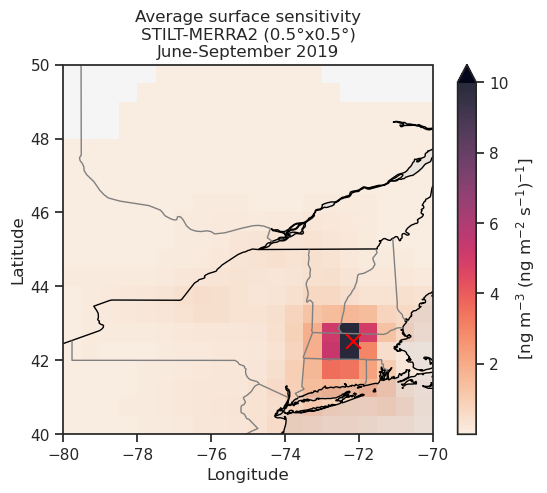

In [6]:
#excellent! Now we have a single footprint array for each timestep.
#Now averaging over this to make a single clean plot for the sensitivity array.
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

lonmin = -80
lonmax = -70
latmin = 40
latmax = 50
ext = [lonmin, lonmax, latmin, latmax]

#avg_sens = ds_concat.mean(dim='time')

proj = ccrs.PlateCarree()

data = f.footprint_convert(avg_sens)
data = zerofilter(data,thresh=1e-3)

ax=plt.subplot(1, 1, 1, projection=proj)
data['foot'].plot(ax=ax,vmax=10,cmap='rocket_r',alpha=0.85,cbar_kwargs={'label': '[ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$]'})
ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(HarvardForest[1],HarvardForest[0],marker='x',c='red',s=110,zorder=11)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_xticks([-80,-78,-76,-74,-72,-70],crs=ccrs.PlateCarree())
ax.set_yticks([40,42,44,46,48,50],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_title('Average sensitivity distribution (August 2014)')
ax.set_title('Average surface sensitivity\nSTILT-MERRA2 (0.5°x0.5°)\nJune-September 2019')
plt.savefig(figpath+'FigS01a.'+figformat,dpi=dpi,transparent=True)
#plt.savefig(figpath+'HF_STILTMERRA2_sens.'+figformat,dpi=dpi,transparent=True)

In [7]:
avg_sens = xr.open_dataset('../../Model_data/HarvardForest/HF_gfs_avgsens.nc')

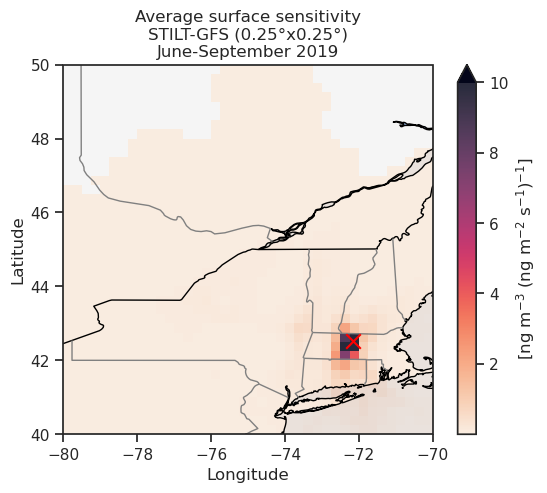

In [8]:
#excellent! Now we have a single footprint array for each timestep.
#Now averaging over this to make a single clean plot for the sensitivity array.
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

lonmin = -80
lonmax = -70
latmin = 40
latmax = 50
ext = [lonmin, lonmax, latmin, latmax]

#avg_sens = f.footprint_convert(ds_concat.mean(dim='time'))

proj = ccrs.PlateCarree()

data = f.footprint_convert(avg_sens)
data = zerofilter(data,thresh=1e-3)

ax=plt.subplot(1, 1, 1, projection=proj)
data['foot'].plot(ax=ax,vmax=10,cmap='rocket_r',alpha=0.85,cbar_kwargs={'label': '[ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$]'})
ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(HarvardForest[1],HarvardForest[0],marker='x',c='red',s=110,zorder=11)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_xticks([-80,-78,-76,-74,-72,-70],crs=ccrs.PlateCarree())
ax.set_yticks([40,42,44,46,48,50],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_title('Average sensitivity distribution (August 2014)')
ax.set_title('Average surface sensitivity\nSTILT-GFS (0.25°x0.25°)\nJune-September 2019')
#plt.savefig(figpath+'HF_STILTGFS_sens.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS01b.'+figformat,dpi=dpi,transparent=True)


In [9]:
avg_sens = xr.open_dataset('../../Model_data/HarvardForest/HF_nam_avgsens.nc')

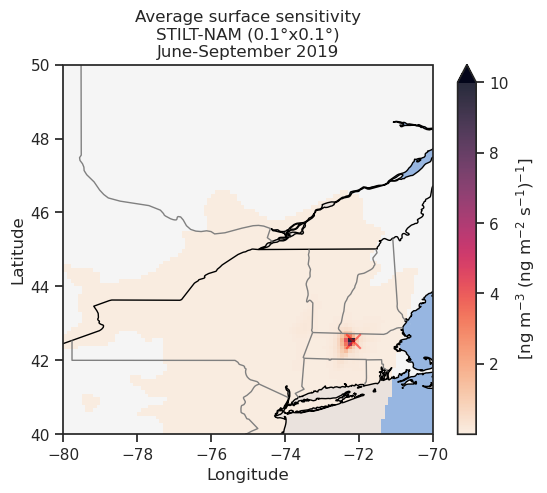

In [10]:
#excellent! Now we have a single footprint array for each timestep.
#Now averaging over this to make a single clean plot for the sensitivity array.
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

lonmin = -80
lonmax = -70
latmin = 40
latmax = 50
ext = [lonmin, lonmax, latmin, latmax]

#avg_sens = ds_concat.mean(dim='time')

proj = ccrs.PlateCarree()

data = f.footprint_convert(avg_sens)
data = zerofilter(data,thresh=1e-3)

ax=plt.subplot(1, 1, 1, projection=proj)
data['foot'].plot(ax=ax,vmax=10,cmap='rocket_r',alpha=0.85,cbar_kwargs={'label': '[ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$]'})
ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(HarvardForest[1],HarvardForest[0],marker='x',c='red',s=110,zorder=11,alpha=0.5)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_xticks([-80,-78,-76,-74,-72,-70],crs=ccrs.PlateCarree())
ax.set_yticks([40,42,44,46,48,50],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_title('Average sensitivity distribution (August 2014)')
ax.set_title('Average surface sensitivity\nSTILT-NAM (0.1°x0.1°)\nJune-September 2019')
plt.savefig(figpath+'FigS01c.'+figformat,dpi=dpi,transparent=True)
#plt.savefig(figpath+'HF_STILTNAM_sens.'+figformat,dpi=dpi,transparent=True)

**Figure S2** - ATARS STILT Sensitivities

In [11]:
avg_sens = xr.open_dataset('../../Model_data/ATARS/ATARS_merra2_avgsens.nc')

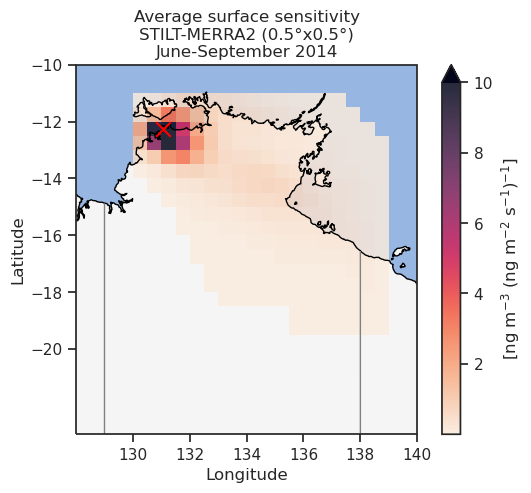

In [12]:
#excellent! Now we have a single footprint array for each timestep.
#Now averaging over this to make a single clean plot for the sensitivity array.
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

lonmin = 128
lonmax = 140
latmin = -23
latmax = -10
ext = [lonmin, lonmax, latmin, latmax]

#avg_sens = ds_concat.mean(dim='time')

proj = ccrs.PlateCarree()

data = f.footprint_convert(avg_sens)
data = zerofilter(data,thresh=1e-3)

ax=plt.subplot(1, 1, 1, projection=proj)
data['foot'].plot(ax=ax,vmax=10,cmap='rocket_r',alpha=0.85,cbar_kwargs={'label': '[ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$]'})
ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(GunnPoint[1],GunnPoint[0],marker='x',c='red',s=110,zorder=11)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_xticks([130,132,134,136,138,140],crs=ccrs.PlateCarree())
ax.set_yticks([-10,-12,-14,-16,-18,-20],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_title('Average sensitivity distribution (August 2014)')
ax.set_title('Average surface sensitivity\nSTILT-MERRA2 (0.5°x0.5°)\nJune-September 2014')
#plt.savefig(figpath+'GP_STILTMERRA2_2014_sens.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS02a.'+figformat,dpi=dpi,transparent=True)

In [13]:
avg_sens = xr.open_dataset('../../Model_data/ATARS/ATARS_gdas_avgsens.nc')

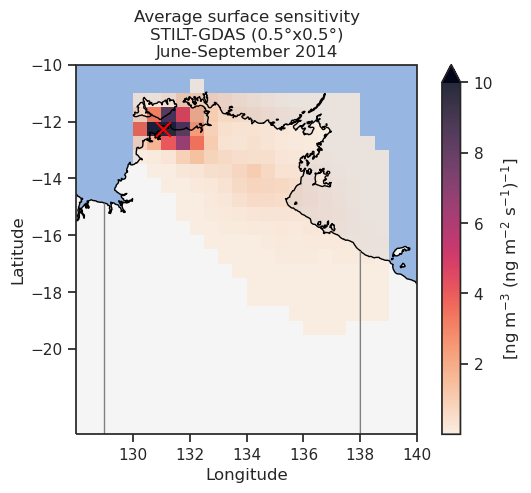

In [14]:
#excellent! Now we have a single footprint array for each timestep.
#Now averaging over this to make a single clean plot for the sensitivity array.
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

lonmin = 128
lonmax = 140
latmin = -23
latmax = -10
ext = [lonmin, lonmax, latmin, latmax]

#avg_sens = ds_concat.mean(dim='time')

proj = ccrs.PlateCarree()

data = f.footprint_convert(avg_sens)
data = zerofilter(data,thresh=1e-3)

ax=plt.subplot(1, 1, 1, projection=proj)
data['foot'].plot(ax=ax,vmax=10,cmap='rocket_r',alpha=0.85,cbar_kwargs={'label': '[ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$]'})
ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(GunnPoint[1],GunnPoint[0],marker='x',c='red',s=110,zorder=11)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_xticks([130,132,134,136,138,140],crs=ccrs.PlateCarree())
ax.set_yticks([-10,-12,-14,-16,-18,-20],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_title('Average sensitivity distribution (August 2014)')
ax.set_title('Average surface sensitivity\nSTILT-GDAS (0.5°x0.5°)\nJune-September 2014')
#plt.savefig(figpath+'GP_STILTGDAS_2014_sens.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS02b.'+figformat,dpi=dpi,transparent=True)

**Figure S3** - Chacaltaya STILT Sensitivities

In [15]:
avg_sens = xr.open_dataset('../../Model_data/CHC/CHC_merra2_avgsens.nc')

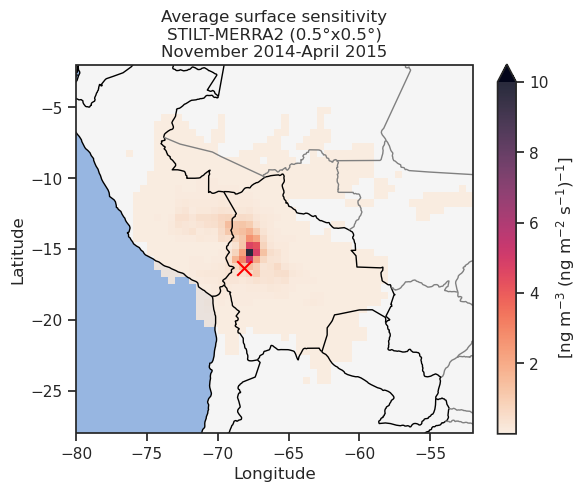

In [16]:
#excellent! Now we have a single footprint array for each timestep.
#Now averaging over this to make a single clean plot for the sensitivity array.
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

lonmin = -80
lonmax = -52
latmin = -28
latmax = -2
ext = [lonmin, lonmax, latmin, latmax]

#avg_sens = ds_concat.mean(dim='time')

proj = ccrs.PlateCarree()

data = f.footprint_convert(avg_sens)
data = zerofilter(data,thresh=1e-3)

ax=plt.subplot(1, 1, 1, projection=proj)
data['foot'].plot(ax=ax,vmax=10,cmap='rocket_r',alpha=0.85,cbar_kwargs={'label': '[ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$]'})
ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(Chacaltaya[1],Chacaltaya[0],marker='x',c='red',s=110,zorder=11)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_xticks([-80,-75,-70,-65,-60,-55],crs=ccrs.PlateCarree())
ax.set_yticks([-25,-20,-15,-10,-5],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_title('Average sensitivity distribution (August 2014)')
ax.set_title('Average surface sensitivity\nSTILT-MERRA2 (0.5°x0.5°)\nNovember 2014-April 2015')
#plt.savefig(figpath+'CH_STILTMERRA2_sens.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS03a.'+figformat,dpi=dpi,transparent=True)

In [17]:
avg_sens = xr.open_dataset('../../Model_data/CHC/CHC_gdas_avgsens.nc')

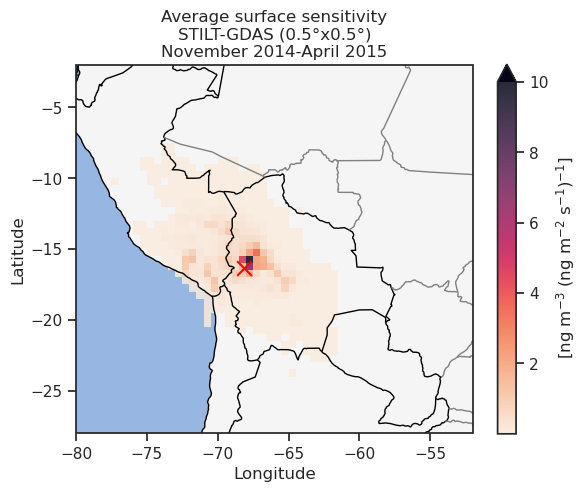

In [18]:
#excellent! Now we have a single footprint array for each timestep.
#Now averaging over this to make a single clean plot for the sensitivity array.
states_provinces = cfeature.NaturalEarthFeature(
                             category='cultural',
                             name='admin_1_states_provinces_lines',
                             scale='50m',
                             facecolor='none')

lonmin = -80
lonmax = -52
latmin = -28
latmax = -2
ext = [lonmin, lonmax, latmin, latmax]

#avg_sens = ds_concat.mean(dim='time')

proj = ccrs.PlateCarree()

data = f.footprint_convert(avg_sens)
data = zerofilter(data,thresh=1e-3)

ax=plt.subplot(1, 1, 1, projection=proj)
data['foot'].plot(ax=ax,vmax=10,cmap='rocket_r',alpha=0.85,cbar_kwargs={'label': '[ng m$^{-3}$ (ng m$^{-2}$ s$^{-1}$)$^{-1}$]'})
ax.set_extent(ext,crs=proj)
ax.coastlines()
ax.scatter(Chacaltaya[1],Chacaltaya[0],marker='x',c='red',s=110,zorder=11)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,color='whitesmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states_provinces, edgecolor='gray')
ax.set_xticks([-80,-75,-70,-65,-60,-55],crs=ccrs.PlateCarree())
ax.set_yticks([-25,-20,-15,-10,-5],crs=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#ax.set_title('Average sensitivity distribution (August 2014)')
ax.set_title('Average surface sensitivity\nSTILT-GDAS (0.5°x0.5°)\nNovember 2014-April 2015')
#plt.savefig(figpath+'CH_STILTGDAS_sens.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS03b.'+figformat,dpi=dpi,transparent=True)

**Figure S4** - Concentration signal at Harvard Forest

In [19]:
%%capture --no-stdout

#Before we do anything, need to compare base and nested run results
obs = f.read_obs('Harvard')
ds_dd,df_dd = f.read_gc('Harvard',HarvardForest,run='run0045')       #This is the 2x2.5 run.
ds_nodd,df_nodd = f.read_gc('Harvard',HarvardForest,run='run0046')

In [20]:
%%capture --no-stdout
ds_dd_n,df_dd_n = f.read_gc('Harvard',HarvardForest,run='run0051',compiled=True)  #This is the 0.5x0.625 run. Needs complementary nodd nested run.
ds_nodd_n,df_nodd_n = f.read_gc('Harvard',HarvardForest,run='run0051_nodd',compiled=True)  #This is the 0.5x0.625 run. Needs complementary nodd nested run.

dd = f.deposition_conv(ds_dd,HarvardForest)                          #define dry deposition flux from base run, units = ng m-2 hr-1
nodd = f.deposition_conv(ds_nodd,HarvardForest)                      #define dry deposition flux from sensitivity run

dd_n = f.deposition_conv(ds_dd_n,HarvardForest)                          #define dry deposition flux from base run, units = ng m-2 hr-1
nodd_n = f.deposition_conv(ds_nodd_n,HarvardForest)                      #define dry deposition flux from sensitivity run

In [21]:
def stilt_sig_read(path):
    df = pd.read_csv(path)
    df['time'] = pd.to_datetime(df['time'])
    return df.set_index('time')

In [22]:
gfs_5m_df = stilt_sig_read('../../Model_data/HarvardForest/ST_gfs.csv')
merra_df = stilt_sig_read('../../Model_data/HarvardForest/ST_merra.csv')
nam_df = stilt_sig_read('../../Model_data/HarvardForest/ST_nam.csv')

In [23]:
#now making stilt signals for each meteorological dataset

In [24]:
df = pd.merge(df_dd['SpeciesConcVV_Hg0'],df_nodd['SpeciesConcVV_Hg0'],left_index=True,right_index=True)
df = pd.merge(df,df_dd_n['SpeciesConcVV_Hg0'],left_index=True,right_index=True)
df = df.rename(columns={"SpeciesConcVV_Hg0_x": "dd", "SpeciesConcVV_Hg0_y": "nodd","SpeciesConcVV_Hg0": "dd_n","airGEM":"obs"})
df = pd.merge(df,df_nodd_n['SpeciesConcVV_Hg0'],left_index=True,right_index=True)
df = df.rename(columns={"SpeciesConcVV_Hg0": "nodd_n"})
df = pd.merge(df,obs['airGEM'],left_index=True,right_index=True,how='inner')
df = pd.merge(df,gfs_5m_df,left_index=True,right_index=True,how='outer')
df = pd.merge(df,merra_df,left_index=True,right_index=True,how='outer')
df = pd.merge(df,nam_df,left_index=True,right_index=True,how='outer')

df = df.rename(columns={"SpeciesConcVV_Hg0_x": "dd", "SpeciesConcVV_Hg0_y": "nodd","SpeciesConcVV_Hg0": "nodd_n","airGEM":"obs"})

df = df.resample('1D').mean()

df['signal'] = df['nodd']-df['dd']#
df['signal_n'] = df['nodd_n']-df['dd_n']

In [25]:
#now detrending df
df_roll = df.rolling(60,center=True,min_periods=1).mean()
df = df - df_roll

df = df[df.index>='2019-06-01']
df = df[df.index<='2019-09-30']

In [26]:
lb = df.resample('1W').quantile(0.025)
ub = df.resample('1W').quantile(0.975)

rng = ub - lb

In [27]:
def rng_95(df,array=False):
    lb = df.quantile(0.025)
    ub = df.quantile(0.975)
    if array == False:
        return ub-lb
    if array == True:
        mean = df.mean()
        yerr_lower = mean - lb
        yerr_upper = ub - mean
        return np.array([np.array([yerr_lower]),np.array([yerr_upper])])

In [28]:
grs = sns.color_palette("Greens", 20)

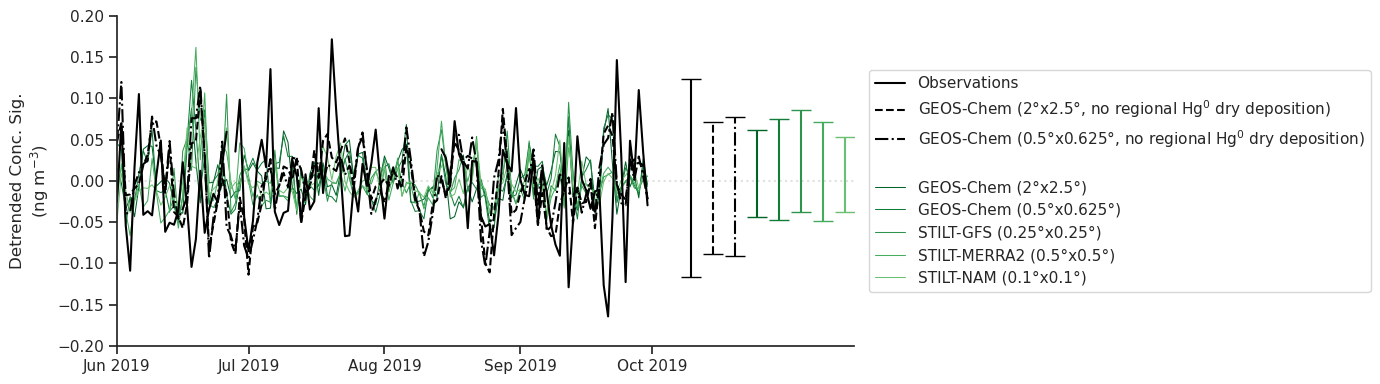

In [29]:
fig,ax=plt.subplots(figsize=(14,4))
ax.plot(df['obs'],linewidth=1.5,c='black',label='Observations')
ax.plot(df['nodd'],linewidth=1.5,c='black',linestyle='--',label='GEOS-Chem (2°x2.5°, no regional Hg$^{0}$ dry deposition)')
ax.plot(df['nodd_n'],linewidth=1.5,c='black',linestyle='-.',label='GEOS-Chem (0.5°x0.625°, no regional Hg$^{0}$ dry deposition)')

ax.plot(df['nodd'],linewidth=0.75,c='dimgray',label=' ',alpha=0)
ax.plot(df['signal'],c=grs[18],linewidth=0.75,label='GEOS-Chem (2°x2.5°)',zorder=0)
ax.plot(df['signal_n'],c=grs[16],linewidth=0.75,label='GEOS-Chem (0.5°x0.625°)',zorder=0)
ax.plot(df['gfs_5m_ngm-3'],c=grs[14],linewidth=0.75,label='STILT-GFS (0.25°x0.25°)',zorder=0)
ax.plot(df['merra_ngm-3'],c=grs[12],linewidth=0.75,label='STILT-MERRA2 (0.5°x0.5°)',zorder=0)
ax.plot(df['nam_ngm-3'],c=grs[10],linewidth=0.75,label='STILT-NAM (0.1°x0.1°)',zorder=0)

ax.axhline(0,c='dimgray',linestyle=':',alpha=0.2,zorder=0)
ax.set_xlim(pd.to_datetime('2019-06-01'),pd.to_datetime('2019-11-16'))
ax.set_xticks(['2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01'])#,'2019-10-10','2019-10-20','2019-10-30','2019-11-10','2019-11-20','2019-12-01','2019-12-10'])
ax.set_xticklabels(['Jun 2019','Jul 2019','Aug 2019','Sep 2019','Oct 2019'])
#plt.plot(df['nodd']-df['signal'])

ax.errorbar(pd.to_datetime('2019-10-10'), 0, yerr=rng_95(df['obs'],array=True), capsize=7, c="black")
a=ax.errorbar(pd.to_datetime('2019-10-15'), df['nodd'].mean(), yerr=rng_95(df['nodd'],array=True), capsize=7, c="black")
b=ax.errorbar(pd.to_datetime('2019-10-20'), df['nodd_n'].mean(), yerr=rng_95(df['nodd_n'],array=True), capsize=7, c="black")
a[-1][0].set_linestyle('--')
b[-1][0].set_linestyle('-.')

ax.errorbar(pd.to_datetime('2019-10-25'), (df['signal']).mean(), yerr=rng_95(df['signal'],array=True), capsize=7, c=grs[18])
ax.errorbar(pd.to_datetime('2019-10-30'), df['signal_n'].mean(), yerr=rng_95(df['signal_n'],array=True), capsize=7, c=grs[16])
ax.errorbar(pd.to_datetime('2019-11-04'), df['gfs_5m_ngm-3'].mean(), yerr=rng_95(df['gfs_5m_ngm-3'],array=True), capsize=7, c=grs[14])
ax.errorbar(pd.to_datetime('2019-11-09'), df['merra_ngm-3'].mean(), yerr=rng_95(df['merra_ngm-3'],array=True), capsize=7, c=grs[12])
ax.errorbar(pd.to_datetime('2019-11-14'), df['nam_ngm-3'].mean(), yerr=rng_95(df['nam_ngm-3'],array=True), capsize=7, c=grs[10])

ax.legend(loc='center left',bbox_to_anchor=(1.01,0.5))
ax.set_ylabel ('Detrended Conc. Sig.\n(ng m$^{-3}$)')
ax.set_ylim(-0.2,0.2)
plt.tight_layout()
#plt.savefig(figpath+'Supplemental_HarvardForest_variability.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS04.'+figformat,dpi=dpi,transparent=True)

**Figures S5 and S6** - Concentration signal at ATARS

In [30]:
%%capture --no-stdout
obs = f.read_obs('GunnPoint',test=True)
obs = obs.set_index('date')

#outliers on September 9th and 10th of 2015 right before instrument failure. Removing from dataset.
obs = obs[obs.index<'2015-09-09']

In [31]:
#Base res
ds_bb,df_bb = f.read_gc('GunnPoint',GunnPoint,run='run0018',surf=True)
ds_nobb,df_nobb = f.read_gc('GunnPoint',GunnPoint,run='run0019',surf=True)
ds_nont,df_nont = f.read_gc('GunnPoint',GunnPoint,run='run0038',surf=True)

#Nested res
ds_bb_n,df_bb_n = f.read_gc('GunnPoint',GunnPoint,run='run0022',surf=True)
ds_nobb_n,df_nobb_n = f.read_gc('GunnPoint',GunnPoint,run='run0023',surf=True)
ds_nont_n,df_nont_n = f.read_gc('GunnPoint',GunnPoint,run='run0039',surf=True)

In [32]:
#now reading 2014

In [33]:
gdas_gfed_df = stilt_sig_read('../../Model_data/ATARS/STILT/ST_gdas_2014_gfed.csv')
gdas_finn_df = stilt_sig_read('../../Model_data/ATARS/STILT/ST_gdas_2014_finn.csv')
merra_gfed_df = stilt_sig_read('../../Model_data/ATARS/STILT/ST_merra_2014_gfed.csv')
merra_finn_df = stilt_sig_read('../../Model_data/ATARS/STILT/ST_merra_2014_finn.csv')

In [34]:
%%capture --no-stdout

#merge observations and gc, subset for desired period
df_bb14 = df_bb.rename(columns={'conc_ngm3':'bb_ngm-3'})     #renaming concentration
df_bb14['nobb_ngm-3'] = df_nobb['conc_ngm3']                 #adding concentration from bb off run
df_bb14['nont_ngm-3'] = df_nont['conc_ngm3']                 #adding concentration from bb off run

#calculate NT signal
df_bb14['signal'] = df_bb14['bb_ngm-3'] - df_bb14['nont_ngm-3']

df_bb14['bb_n_ngm-3'] = df_bb_n['conc_ngm3']                   #adding concentration from bb off run
df_bb14['nobb_n_ngm-3'] = df_nobb_n['conc_ngm3']               #adding concentration from bb off run
df_bb14['nont_n_ngm-3'] = df_nont_n['conc_ngm3']               #adding concentration from bb off run

#calculate NT signal (nested
df_bb14['signal_n'] = df_bb14['bb_n_ngm-3'] - df_bb14['nont_n_ngm-3']

df_bb14['gdas_gfed_ngm-3'] = gdas_gfed_df['gdas_gfed_ngm-3']
df_bb14['gdas_finn_ngm-3'] = gdas_finn_df['gdas_finn_ngm-3'] 
df_bb14['merra_gfed_ngm-3'] = merra_gfed_df['merra_gfed_ngm-3']
df_bb14['merra_finn_ngm-3'] = merra_finn_df['merra_finn_ngm-3']

df_bb14 = df_bb14[df_bb14.index>='6-1-2014']
df_bb14 = df_bb14[df_bb14.index<='10-1-2014']
df_bb14 = df_bb14.resample('1D').mean()

#merge with obs
df_bb14 = pd.merge(df_bb14,obs['conc5_avg'],left_index=True,right_index=True) #.dropna()

#resample to specified frequency
#df_bb14 = df_bb14.resample('1D').mean()
df_bb14_roll = df_bb14.rolling(60,min_periods=1,center=True).mean()

#drop na values and detrend
df_bb14_nonan = df_bb14 #.dropna()
df_bb14_nonan_r = df_bb14_roll.loc[df_bb14_nonan.index]
df_bb14_dt = df_bb14_nonan - df_bb14_nonan_r                          #Detrended observations and model

#make sure surface data cover same timerange, resample
#ds_dd_merged = ds_dd['SpeciesConcVV_Hg0'].resample(time=resample).mean().sel(time=obs_gc.index)
#ds_nodd_merged = ds_nodd['SpeciesConcVV_Hg0'].resample(time=resample).mean().sel(time=obs_gc.index)

#defining priors
#prior_dd = (obs_gc['dd_ngm-2hr-1']*24).sum()/1000 #converting to cumulative sum in units of ug m-2
#meas_dd = (obs_gc['ac.GEMflux.outlier.interp']*24).sum()/1000*-1 #negative factor to ensure consistent directionality


In [35]:
#now reading 2015

In [36]:
gdas_gfed_df = stilt_sig_read('../../Model_data/ATARS/STILT/ST_gdas_2015_gfed.csv')
gdas_finn_df = stilt_sig_read('../../Model_data/ATARS/STILT/ST_gdas_2015_finn.csv')
merra_gfed_df = stilt_sig_read('../../Model_data/ATARS/STILT/ST_merra_2015_gfed.csv')
merra_finn_df = stilt_sig_read('../../Model_data/ATARS/STILT/ST_merra_2015_finn.csv')

In [37]:
%%capture --no-stdout

#merge observations and gc, subset for desired period
df_bb15 = df_bb.rename(columns={'conc_ngm3':'bb_ngm-3'})     #renaming concentration
df_bb15['nobb_ngm-3'] = df_nobb['conc_ngm3']                 #adding concentration from bb off run
df_bb15['nont_ngm-3'] = df_nont['conc_ngm3']                 #adding concentration from bb off run

#calculate NT signal
df_bb15['signal'] = df_bb15['bb_ngm-3'] - df_bb15['nont_ngm-3']


df_bb15['bb_n_ngm-3'] = df_bb_n['conc_ngm3']                   #adding concentration from bb off run
df_bb15['nobb_n_ngm-3'] = df_nobb_n['conc_ngm3']               #adding concentration from bb off run
df_bb15['nont_n_ngm-3'] = df_nont_n['conc_ngm3']               #adding concentration from bb off run

#calculate NT signal (nested
df_bb15['signal_n'] = df_bb15['bb_n_ngm-3'] - df_bb15['nont_n_ngm-3']

df_bb15['gdas_gfed_ngm-3'] = gdas_gfed_df['gdas_gfed_ngm-3']
df_bb15['gdas_finn_ngm-3'] = gdas_finn_df['gdas_finn_ngm-3'] 
df_bb15['merra_gfed_ngm-3'] = merra_gfed_df['merra_gfed_ngm-3']
df_bb15['merra_finn_ngm-3'] = merra_finn_df['merra_finn_ngm-3']

df_bb15 = df_bb15[df_bb15.index>='6-1-2015']
df_bb15 = df_bb15[df_bb15.index<='10-1-2015']
df_bb15 = df_bb15.resample('1D').mean()

#merge with obs
df_bb15 = pd.merge(df_bb15,obs['conc5_avg'],left_index=True,right_index=True) #.dropna()

#resample to specified frequency
df_bb15 = df_bb15.resample('1D').mean()
df_bb15_roll = df_bb15.rolling(60,min_periods=1,center=True).mean()

#drop na values and detrend
df_bb15_nonan = df_bb15 #.dropna()
df_bb15_nonan_r = df_bb15_roll.loc[df_bb15_nonan.index]
df_bb15_dt = df_bb15_nonan - df_bb15_nonan_r                          #Detrended observations and model

#make sure surface data cover same timerange, resample
#ds_dd_merged = ds_dd['SpeciesConcVV_Hg0'].resample(time=resample).mean().sel(time=obs_gc.index)
#ds_nodd_merged = ds_nodd['SpeciesConcVV_Hg0'].resample(time=resample).mean().sel(time=obs_gc.index)

#defining priors
#prior_dd = (obs_gc['dd_ngm-2hr-1']*24).sum()/1000 #converting to cumulative sum in units of ug m-2
#meas_dd = (obs_gc['ac.GEMflux.outlier.interp']*24).sum()/1000*-1 #negative factor to ensure consistent directionality


In [38]:
flr = sns.color_palette("flare", 20)

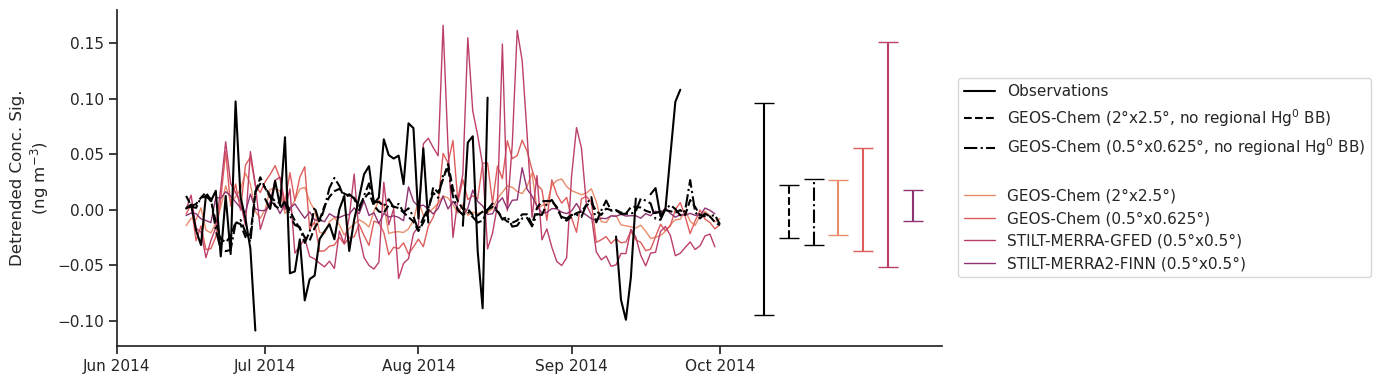

In [39]:
fig,ax=plt.subplots(figsize=(14,4))
#ax.plot(df['obs'],linewidth=0.5,c='black',label='')
ax.plot(df_bb14_dt['conc5_avg'],linewidth=1.5,c='black',label='Observations')
ax.plot(df_bb14_dt['nobb_ngm-3'],linewidth=1.5,c='black',linestyle='--',label='GEOS-Chem (2°x2.5°, no regional Hg$^{0}$ BB)')
ax.plot(df_bb14_dt['nobb_n_ngm-3'],linewidth=1.5,c='black',linestyle='-.',label='GEOS-Chem (0.5°x0.625°, no regional Hg$^{0}$ BB)')

ax.plot(df_bb14_dt['nobb_ngm-3'],linewidth=0.5,c='dimgray',label=' ',alpha=0)
ax.plot(df_bb14_dt['signal'],c=flr[2],linewidth=1,label='GEOS-Chem (2°x2.5°)',zorder=0)
ax.plot(df_bb14_dt['signal_n'],c=flr[6],linewidth=1,label='GEOS-Chem (0.5°x0.625°)',zorder=0)
ax.plot(df_bb14_dt['merra_gfed_ngm-3'],c=flr[10],linewidth=1,label='STILT-MERRA-GFED (0.5°x0.5°)',zorder=0)
ax.plot(df_bb14_dt['merra_finn_ngm-3'],c=flr[14],linewidth=1,label='STILT-MERRA2-FINN (0.5°x0.5°)',zorder=0)
#ax.plot(df_bb14_dt['nam_ngm-3'],c=grs[18],linewidth=1,label='STILT-NAM (0.1°x0.1°)$^{*}$')

ax.set_xlim(pd.to_datetime('2014-06-01'),pd.to_datetime('2014-11-15'))
ax.set_xticks(['2014-06-01','2014-07-01','2014-08-01','2014-09-01','2014-10-01'])#,'2019-10-10','2019-10-20','2019-10-30','2019-11-10','2019-11-20','2019-12-01','2019-12-10'])
ax.set_xticklabels(['Jun 2014','Jul 2014','Aug 2014','Sep 2014','Oct 2014'])

ax.errorbar(pd.to_datetime('2014-10-10'), 0, yerr=rng_95(df_bb14_dt['conc5_avg'],array=True), capsize=7, c="black")
a=ax.errorbar(pd.to_datetime('2014-10-15'), df_bb14_dt['nobb_ngm-3'].mean(), yerr=rng_95(df_bb14_dt['nobb_ngm-3'],array=True), capsize=7, c="black")
b=ax.errorbar(pd.to_datetime('2014-10-20'), df_bb14_dt['nobb_n_ngm-3'].mean(), yerr=rng_95(df_bb14_dt['nobb_n_ngm-3'],array=True), capsize=7, c="black")
a[-1][0].set_linestyle('--')
b[-1][0].set_linestyle('-.')

ax.errorbar(pd.to_datetime('2014-10-25'), df_bb14_dt['signal'].mean(), yerr=rng_95(df_bb14_dt['signal'],array=True), capsize=7, c=flr[2])
ax.errorbar(pd.to_datetime('2014-10-30'), df_bb14_dt['signal_n'].mean(), yerr=rng_95(df_bb14_dt['signal_n'],array=True), capsize=7, c=flr[6])
ax.errorbar(pd.to_datetime('2014-11-04'), df_bb14_dt['merra_gfed_ngm-3'].mean(), yerr=rng_95(df_bb14_dt['merra_gfed_ngm-3'],array=True), capsize=7, c=flr[10])
ax.errorbar(pd.to_datetime('2014-11-09'), df_bb14_dt['merra_finn_ngm-3'].mean(), yerr=rng_95(df_bb14_dt['merra_finn_ngm-3'],array=True), capsize=7, c=flr[14])
#ax.errorbar(pd.to_datetime('2014-11-14'), df_bb14_dt['nam_ngm-3'].mean(), yerr=rng_95(df_bb14_dt['nam_ngm-3'],array=True), capsize=7, c=grs[18])

ax.legend(loc='center left',bbox_to_anchor=(1.01,0.5))
ax.set_ylabel ('Detrended Conc. Sig.\n(ng m$^{-3}$)')
plt.tight_layout()
#plt.savefig(figpath+'Supplemental_GunnPoint2014_variability.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS05.'+figformat,dpi=dpi,transparent=True)

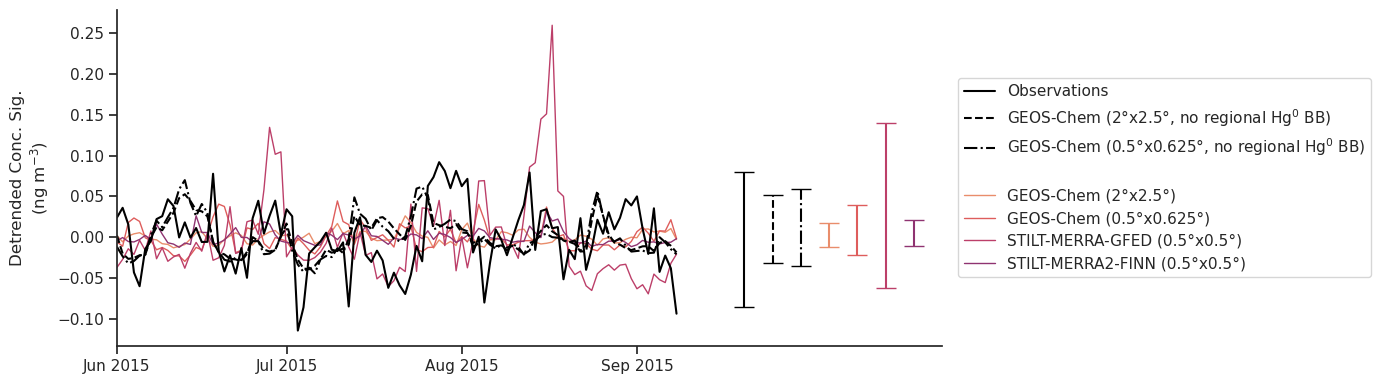

In [40]:
fig,ax=plt.subplots(figsize=(14,4))
#ax.plot(df['obs'],linewidth=0.5,c='black',label='')
ax.plot(df_bb15_dt['conc5_avg'],linewidth=1.5,c='black',label='Observations')
ax.plot(df_bb15_dt['nobb_ngm-3'],linewidth=1.5,c='black',linestyle='--',label='GEOS-Chem (2°x2.5°, no regional Hg$^{0}$ BB)')
ax.plot(df_bb15_dt['nobb_n_ngm-3'],linewidth=1.5,c='black',linestyle='-.',label='GEOS-Chem (0.5°x0.625°, no regional Hg$^{0}$ BB)')

ax.plot(df_bb15_dt['nobb_ngm-3'],linewidth=0.5,c='dimgray',label=' ',alpha=0)
ax.plot(df_bb15_dt['signal'],c=flr[2],linewidth=1,label='GEOS-Chem (2°x2.5°)',zorder=0)
ax.plot(df_bb15_dt['signal_n'],c=flr[6],linewidth=1,label='GEOS-Chem (0.5°x0.625°)',zorder=0)
ax.plot(df_bb15_dt['merra_gfed_ngm-3'],c=flr[10],linewidth=1,label='STILT-MERRA-GFED (0.5°x0.5°)',zorder=0)
ax.plot(df_bb15_dt['merra_finn_ngm-3'],c=flr[14],linewidth=1,label='STILT-MERRA2-FINN (0.5°x0.5°)',zorder=0)

ax.set_xlim(pd.to_datetime('2015-06-01'),pd.to_datetime('2015-10-25'))
ax.set_xticks(['2015-06-01','2015-07-01','2015-08-01','2015-09-01'])#,'2019-10-10','2019-10-20','2019-10-30','2019-11-10','2019-11-20','2019-12-01','2019-12-10'])
ax.set_xticklabels(['Jun 2015','Jul 2015','Aug 2015','Sep 2015'])

ax.errorbar(pd.to_datetime('2015-09-20'), 0, yerr=rng_95(df_bb15_dt['conc5_avg'],array=True), capsize=7, c="black")
a=ax.errorbar(pd.to_datetime('2015-09-25'), df_bb15_dt['nobb_ngm-3'].mean(), yerr=rng_95(df_bb15_dt['nobb_ngm-3'],array=True), capsize=7, c="black")
b=ax.errorbar(pd.to_datetime('2015-09-30'), df_bb15_dt['nobb_n_ngm-3'].mean(), yerr=rng_95(df_bb15_dt['nobb_n_ngm-3'],array=True), capsize=7, c="black")
a[-1][0].set_linestyle('--')
b[-1][0].set_linestyle('-.')

ax.errorbar(pd.to_datetime('2015-10-05'), df_bb15_dt['signal'].mean(), yerr=rng_95(df_bb15_dt['signal'],array=True), capsize=7, c=flr[2])
ax.errorbar(pd.to_datetime('2015-10-10'), df_bb15_dt['signal_n'].mean(), yerr=rng_95(df_bb15_dt['signal_n'],array=True), capsize=7, c=flr[6])
ax.errorbar(pd.to_datetime('2015-10-15'), df_bb15_dt['merra_gfed_ngm-3'].mean(), yerr=rng_95(df_bb15_dt['merra_gfed_ngm-3'],array=True), capsize=7, c=flr[10])
ax.errorbar(pd.to_datetime('2015-10-20'), df_bb15_dt['merra_finn_ngm-3'].mean(), yerr=rng_95(df_bb15_dt['merra_finn_ngm-3'],array=True), capsize=7, c=flr[14])

ax.legend(loc='center left',bbox_to_anchor=(1.01,0.5))
ax.set_ylabel ('Detrended Conc. Sig.\n(ng m$^{-3}$)')
plt.tight_layout()
#plt.savefig(figpath+'Supplemental_GunnPoint2015_variability.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS06.'+figformat,dpi=dpi,transparent=True)

**Figures S7 and S8** - Concentration signal at Chacaltaya

In [41]:
%%capture --no-stdout

d_start = '2014-11-01' #start date
d_end = '2015-06-30'   #end date (I think this is inclusive, need to confirm)
#resample = '1D'        #averaging interval
obs_name = 'TGM_valid'    #measured concentration column name
#stat = '95th'          #95th percentile range
#rolling_period = 60    #days
#stilt_path = '/home/emroy/GP/ACP/scripts/final/data/STILT/Chacaltaya/'
#stilt_hours = 24

obs = pd.DataFrame(f.read_obs('Chacaltaya'))
ds,df = f.read_gc('Chacaltaya',Chacaltaya)
scalars,regions,region_names = f.read_asgm_ems()
df = df.resample('1D').mean()

#define emission fields

spun_sig = f.signal_asgm(df['base'],df['spun'],scalars,region='spun')
npun_sig = f.signal_asgm(df['base'],df['npun'],scalars,region='npun')
mdd_sig = f.signal_asgm(df['base'],df['mdd'],scalars,region='mdd')
aqp_sig = f.signal_asgm(df['base'],df['aqp'],scalars,region='aqp')
apr_sig = f.signal_asgm(df['base'],df['apr'],scalars,region='apr')
df['AllRegions'] = spun_sig+npun_sig+mdd_sig+aqp_sig+apr_sig

#merging gc and obs
obs_gc = pd.merge(df,obs.resample('1D').mean(),left_index=True,right_index=True)
obs_gc_roll = obs_gc.rolling(60,min_periods=1,center=True).mean()
obs_gc_nonan = obs_gc.dropna(subset=[obs_name])
obs_gc_nonan_r = obs_gc_roll.loc[obs_gc_nonan.index]
obs_gc_dt = obs_gc_nonan - obs_gc_nonan_r                          #Detrended observations and model

#making df for signals
sigs = pd.DataFrame({'spun':spun_sig,'npun':npun_sig,'mdd':mdd_sig,'aqp':aqp_sig,'apr':apr_sig})
sigs['AllRegions'] = sigs['spun']+sigs['npun']+sigs['mdd']+sigs['aqp']+sigs['apr']
sigs = sigs - sigs.rolling(60,center=True,min_periods=1).mean()
sigs = sigs[sigs.index>d_start]
sigs = sigs[sigs.index<d_end]

In [42]:
#read in emission inventories for STILT
GMA = xr.open_dataset('/net/geoschem/data/gcgrid/data/ExtData//HEMCO/MERCURY/v2022-10/GMA_emissions_Hg.0.25x0.25.2015.nc')
ED10 = xr.open_dataset('/net/geoschem/data/gcgrid/data/ExtData/HEMCO/MERCURY/v2020-07/EDGAR/2010/EDGAR_gold_A_2010_Hg.nc')


In [43]:
#now reading inventory areas
GMA_area = xr.open_dataset('/home/emroy/GP/ICMGP_2024/data/inventory_areas/gma_gridarea.nc')
ED4p1_area = xr.open_dataset('/home/emroy/GP/ICMGP_2024/data/inventory_areas/Edgarv4p1_gridarea.nc')


In [44]:
stilt_path = '../../Model_data/CHC/STILT/'
gma_merra_contrib = xr.open_dataset(stilt_path+'gma_merra.nc4')
ed10_merra_contrib = xr.open_dataset(stilt_path+'ed10_merra.nc4')
gma_gdas_contrib = xr.open_dataset(stilt_path+'gma_gdas.nc4')
ed10_gdas_contrib = xr.open_dataset(stilt_path+'ed10_gdas.nc4')
    

In [45]:
#Calculating total emissions from each considered region
days = gma_gdas_contrib.sortby('time').resample(time='1D').mean().time.size

gma_spuno,gma_npuno,gma_mdd,gma_are,gma_apu = f.asgm_regions(f.unit_convert_asgm(GMA,GMA_area,days=days,Mg=True))
ed10_spuno,ed10_npuno,ed10_mdd,ed10_are,ed10_apu = f.asgm_regions(f.unit_convert_asgm(ED10,ED4p1_area,var='emi_hg_g',days=days,Mg=True))

In [46]:
#Calculating concentration contribution for each region

gma_merra_spuno,gma_merra_npuno,gma_merra_mdd,gma_merra_are,gma_merra_apu = f.asgm_regions(gma_merra_contrib['emi_hg_0_asgm'].sortby('time'),EDGAR_8p1=True)
gma_gdas_spuno,gma_gdas_npuno,gma_gdas_mdd,gma_gdas_are,gma_gdas_apu = f.asgm_regions(gma_gdas_contrib['emi_hg_0_asgm'].sortby('time'),EDGAR_8p1=True)

ed10_merra_spuno,ed10_merra_npuno,ed10_merra_mdd,ed10_merra_are,ed10_merra_apu = f.asgm_regions(ed10_merra_contrib['emi_hg_g'].sortby('time'),EDGAR_8p1=True)
ed10_gdas_spuno,ed10_gdas_npuno,ed10_gdas_mdd,ed10_gdas_are,ed10_gdas_apu = f.asgm_regions(ed10_gdas_contrib['emi_hg_g'].sortby('time'),EDGAR_8p1=True)

In [47]:
#define stilt signals
spun_sig_merra_gma = f.signal_asgm_stilt(gma_merra_spuno,gma_spuno).resample('1D').mean()['emi_hg_0_asgm']
npun_sig_merra_gma = f.signal_asgm_stilt(gma_merra_npuno,gma_npuno).resample('1D').mean()['emi_hg_0_asgm']
mdd_sig_merra_gma = f.signal_asgm_stilt(gma_merra_mdd,gma_mdd).resample('1D').mean()['emi_hg_0_asgm']
are_sig_merra_gma = f.signal_asgm_stilt(gma_merra_are,gma_are).resample('1D').mean()['emi_hg_0_asgm']
apu_sig_merra_gma = f.signal_asgm_stilt(gma_merra_apu,gma_apu).resample('1D').mean()['emi_hg_0_asgm']
merra_gma_tot = spun_sig_merra_gma+npun_sig_merra_gma+mdd_sig_merra_gma+are_sig_merra_gma+apu_sig_merra_gma


spun_sig_gdas_gma = f.signal_asgm_stilt(gma_gdas_spuno,gma_spuno).resample('1D').mean()['emi_hg_0_asgm']
npun_sig_gdas_gma = f.signal_asgm_stilt(gma_gdas_npuno,gma_npuno).resample('1D').mean()['emi_hg_0_asgm']
mdd_sig_gdas_gma = f.signal_asgm_stilt(gma_gdas_mdd,gma_mdd).resample('1D').mean()['emi_hg_0_asgm']
are_sig_gdas_gma = f.signal_asgm_stilt(gma_gdas_are,gma_are).resample('1D').mean()['emi_hg_0_asgm']
apu_sig_gdas_gma = f.signal_asgm_stilt(gma_gdas_apu,gma_apu).resample('1D').mean()['emi_hg_0_asgm']
gdas_gma_tot = spun_sig_gdas_gma+npun_sig_gdas_gma+mdd_sig_gdas_gma+are_sig_gdas_gma+apu_sig_gdas_gma

spun_sig_merra_ed10 = f.signal_asgm_stilt(ed10_merra_spuno,ed10_spuno).resample('1D').mean()['emi_hg_g']
npun_sig_merra_ed10 = f.signal_asgm_stilt(ed10_merra_npuno,ed10_npuno).resample('1D').mean()['emi_hg_g']
mdd_sig_merra_ed10 = f.signal_asgm_stilt(ed10_merra_mdd,ed10_mdd).resample('1D').mean()['emi_hg_g']
are_sig_merra_ed10 = f.signal_asgm_stilt(ed10_merra_are,ed10_are).resample('1D').mean()['emi_hg_g']
apu_sig_merra_ed10 = f.signal_asgm_stilt(ed10_merra_apu,ed10_apu).resample('1D').mean()['emi_hg_g']
merra_ed10_tot = spun_sig_merra_ed10+npun_sig_merra_ed10+mdd_sig_merra_ed10+are_sig_merra_ed10+apu_sig_merra_ed10

spun_sig_gdas_ed10 = f.signal_asgm_stilt(ed10_gdas_spuno,ed10_spuno).resample('1D').mean()['emi_hg_g']
npun_sig_gdas_ed10 = f.signal_asgm_stilt(ed10_gdas_npuno,ed10_npuno).resample('1D').mean()['emi_hg_g']
mdd_sig_gdas_ed10 = f.signal_asgm_stilt(ed10_gdas_mdd,ed10_mdd).resample('1D').mean()['emi_hg_g']
are_sig_gdas_ed10 = f.signal_asgm_stilt(ed10_gdas_are,ed10_are).resample('1D').mean()['emi_hg_g']
apu_sig_gdas_ed10 = f.signal_asgm_stilt(ed10_gdas_apu,ed10_apu).resample('1D').mean()['emi_hg_g']
gdas_ed10_tot = spun_sig_gdas_ed10+npun_sig_gdas_ed10+mdd_sig_gdas_ed10+are_sig_gdas_ed10+apu_sig_gdas_ed10

total_df = pd.DataFrame({'merra_gma_tot':merra_gma_tot,'merra_ed10_tot':merra_ed10_tot,'gdas_gma_tot':gdas_gma_tot,'gdas_ed10_tot':gdas_ed10_tot})
total_df = total_df-total_df.rolling(60,center=True,min_periods=1).mean()

mdd_df = pd.DataFrame({'merra_gma':mdd_sig_merra_gma,'merra_ed10':mdd_sig_merra_ed10,'gdas_gma':mdd_sig_gdas_gma,'gdas_ed10':mdd_sig_gdas_ed10})
mdd_df = mdd_df-mdd_df.rolling(60,center=True,min_periods=1).mean()


In [48]:
ylw = sns.color_palette('YlOrBr',15)

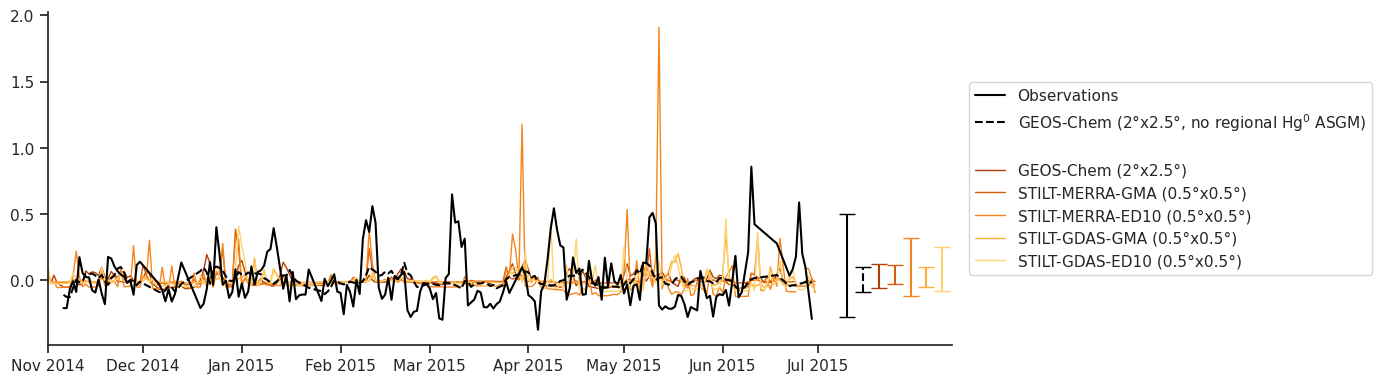

In [49]:
fig,ax=plt.subplots(figsize=(14,4))
#ax.plot(df['obs'],linewidth=0.5,c='black',label='')
ax.plot(obs_gc_dt['TGM_valid'],linewidth=1.5,c='black',label='Observations')
ax.plot(obs_gc_dt['noasgm'],linewidth=1.5,c='black',linestyle='--',label='GEOS-Chem (2°x2.5°, no regional Hg$^{0}$ ASGM)')
ax.plot(obs_gc_dt['noasgm'],alpha=0,linewidth=1.5,c='black',label=' ')

ax.plot(sigs['AllRegions'],linewidth=1,c=ylw[12],label='GEOS-Chem (2°x2.5°)',zorder=0)
ax.plot(total_df['merra_gma_tot'],linewidth=1,c=ylw[10],label='STILT-MERRA-GMA (0.5°x0.5°)',zorder=0)
ax.plot(total_df['merra_ed10_tot'],linewidth=1,c=ylw[8],label='STILT-MERRA-ED10 (0.5°x0.5°)',zorder=0)
ax.plot(total_df['gdas_gma_tot'],linewidth=1,c=ylw[6],label='STILT-GDAS-GMA (0.5°x0.5°)',zorder=0)
ax.plot(total_df['gdas_ed10_tot'],linewidth=1,c=ylw[4],label='STILT-GDAS-ED10 (0.5°x0.5°)',zorder=0)

ax.set_xlim(pd.to_datetime('2014-11-01'),pd.to_datetime('2015-08-12'))
ax.set_xticks(['2014-11-01','2014-12-01','2015-01-01','2015-02-01','2015-03-01','2015-04-01','2015-05-01','2015-06-01','2015-07-01'])#,'2019-10-10','2019-10-20','2019-10-30','2019-11-10','2019-11-20','2019-12-01','2019-12-10'])
ax.set_xticklabels(['Nov 2014','Dec 2014','Jan 2015','Feb 2015','Mar 2015','Apr 2015','May 2015','Jun 2015','Jul 2015'])

ax.errorbar(pd.to_datetime('2015-07-10'), 0, yerr=rng_95(obs_gc_dt['TGM_valid'],array=True), capsize=6, c="black")
a=ax.errorbar(pd.to_datetime('2015-07-15'), obs_gc_dt['noasgm'].mean(), yerr=rng_95(obs_gc_dt['noasgm'],array=True), capsize=6, c="black")
a[-1][0].set_linestyle('--')

ax.errorbar(pd.to_datetime('2015-07-20'), sigs['AllRegions'].mean(), yerr=rng_95(sigs['AllRegions'],array=True), capsize=6, c=ylw[12])
ax.errorbar(pd.to_datetime('2015-07-25'), total_df['merra_gma_tot'].mean(), yerr=rng_95(total_df['merra_gma_tot'],array=True), capsize=6, c=ylw[10])
ax.errorbar(pd.to_datetime('2015-07-30'), total_df['merra_ed10_tot'].mean(), yerr=rng_95(total_df['merra_ed10_tot'],array=True), capsize=6, c=ylw[8])
ax.errorbar(pd.to_datetime('2015-08-04'), total_df['gdas_gma_tot'].mean(), yerr=rng_95(total_df['gdas_gma_tot'],array=True), capsize=6, c=ylw[6])
ax.errorbar(pd.to_datetime('2015-08-09'), total_df['gdas_ed10_tot'].mean(), yerr=rng_95(total_df['gdas_ed10_tot'],array=True), capsize=6, c=ylw[4])

ax.legend(loc='center left',bbox_to_anchor=(1.01,0.5))
plt.tight_layout()
#plt.savefig(figpath+'Supplemental_Chacaltaya_AllRegions_variability.pdf',dpi=600,transparent=True)
plt.savefig(figpath+'FigS07.'+figformat,dpi=dpi,transparent=True)

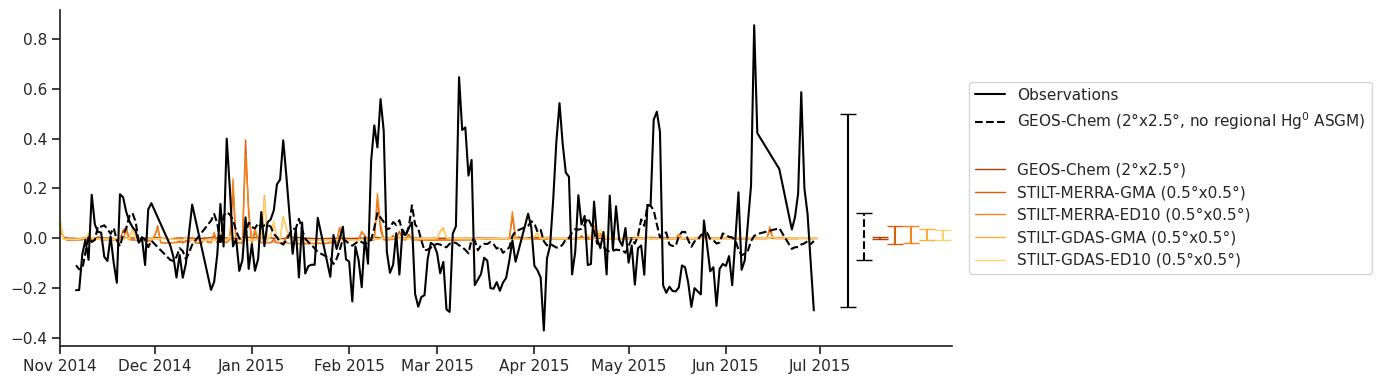

In [50]:
fig,ax=plt.subplots(figsize=(14,4))
#ax.plot(df['obs'],linewidth=0.5,c='black',label='')
ax.plot(obs_gc_dt['TGM_valid'],linewidth=1.5,c='black',label='Observations')
ax.plot(obs_gc_dt['noasgm'],linewidth=1.5,c='black',linestyle='--',label='GEOS-Chem (2°x2.5°, no regional Hg$^{0}$ ASGM)')
ax.plot(obs_gc_dt['noasgm'],alpha=0,linewidth=1.5,c='black',label=' ')


ax.plot(sigs['mdd'],linewidth=1,c=ylw[12],label='GEOS-Chem (2°x2.5°)',zorder=0)
ax.plot(mdd_df['merra_gma'],linewidth=1,c=ylw[10],label='STILT-MERRA-GMA (0.5°x0.5°)',zorder=0)
ax.plot(mdd_df['merra_ed10'],linewidth=1,c=ylw[8],label='STILT-MERRA-ED10 (0.5°x0.5°)',zorder=0)
ax.plot(mdd_df['gdas_gma'],linewidth=1,c=ylw[6],label='STILT-GDAS-GMA (0.5°x0.5°)',zorder=0)
ax.plot(mdd_df['gdas_ed10'],linewidth=1,c=ylw[4],label='STILT-GDAS-ED10 (0.5°x0.5°)',zorder=0)

ax.set_xlim(pd.to_datetime('2014-11-01'),pd.to_datetime('2015-08-12'))
ax.set_xticks(['2014-11-01','2014-12-01','2015-01-01','2015-02-01','2015-03-01','2015-04-01','2015-05-01','2015-06-01','2015-07-01'])#,'2019-10-10','2019-10-20','2019-10-30','2019-11-10','2019-11-20','2019-12-01','2019-12-10'])
ax.set_xticklabels(['Nov 2014','Dec 2014','Jan 2015','Feb 2015','Mar 2015','Apr 2015','May 2015','Jun 2015','Jul 2015'])

ax.errorbar(pd.to_datetime('2015-07-10'), 0, yerr=rng_95(obs_gc_dt['TGM_valid'],array=True), capsize=6, c="black")
a=ax.errorbar(pd.to_datetime('2015-07-15'), obs_gc_dt['noasgm'].mean(), yerr=rng_95(obs_gc_dt['noasgm'],array=True), capsize=6, c="black")
a[-1][0].set_linestyle('--')

ax.errorbar(pd.to_datetime('2015-07-20'), sigs['mdd'].mean(), yerr=rng_95(sigs['mdd'],array=True), capsize=6, c=ylw[12])
ax.errorbar(pd.to_datetime('2015-07-25'), mdd_df['merra_gma'].mean(), yerr=rng_95(mdd_df['merra_gma'],array=True), capsize=6, c=ylw[10])
ax.errorbar(pd.to_datetime('2015-07-30'), mdd_df['merra_ed10'].mean(), yerr=rng_95(mdd_df['merra_ed10'],array=True), capsize=6, c=ylw[8])
ax.errorbar(pd.to_datetime('2015-08-04'), mdd_df['gdas_gma'].mean(), yerr=rng_95(mdd_df['gdas_gma'],array=True), capsize=6, c=ylw[6])
ax.errorbar(pd.to_datetime('2015-08-09'), mdd_df['gdas_ed10'].mean(), yerr=rng_95(mdd_df['gdas_ed10'],array=True), capsize=6, c=ylw[4])

ax.legend(loc='center left',bbox_to_anchor=(1.01,0.5))
plt.tight_layout()
#plt.savefig(figpath+'Supplemental_Chacaltaya_MDD_variability.pdf',dpi=600,transparent=True)
plt.savefig(figpath+'FigS08.'+figformat,dpi=dpi,transparent=True)

**Figures S9** - Metric of variability (Harvard Forest)

In [51]:
%%capture --no-stdout

# ------- user inputs -------
year = '2019'
d_start = year+'-06-01'          #start date
d_end = year+'-09-30'            #end date (inclusive)
resample = '1D'                 #averaging interval
obs_name = 'airGEM'             #measured concentration column name
stat = 'IQR'                   #95th percentile range
rolling_period = 60             #days
MCMC_iter = 100000
bounds = [0,35]                 #range of fluxes over which MCMC is allowed to explore
proposal_std = 10               #stdev of Metropolis-Hastings algorithm (can be adjusted to improve efficiency)
receptor_filt = False

#errors (based on Song et al., 2015)
IC_err = 10 #%
Pr_err = 2 #%

#important for model-measurement errors
x_grid = 2.5
y_grid = 2

x_n_grid = 0.625
y_n_grid = 0.5

SamplingFrequency_agg = False

# --- prior estimates (litterfall) ---

#Using obrist et al. (2021) litterfall value
Total_litterfall = 8.1

# --- Read observations, read concentration signals and respective fluxes from std and nested GC runs ---

obs = f.read_obs('Harvard')
ds_dd,df_dd = f.read_gc('Harvard',HarvardForest,run='run0045')                             #2x2.5 run. Std.
ds_nodd,df_nodd = f.read_gc('Harvard',HarvardForest,run='run0046')                         #2x2.5 run. No dry deposition in NE

ds_dd_n,df_dd_n = f.read_gc('Harvard',HarvardForest,run='run0051',compiled=True)           #0.5x0.625 run. Std.
ds_nodd_n,df_nodd_n = f.read_gc('Harvard',HarvardForest,run='run0051_nodd',compiled=True)  #0.5x0.625 run. No dry deposition in NE.

dd = f.deposition_conv(ds_dd,HarvardForest)                                                #dd flux from base run, ng m-2 hr-1
nodd = f.deposition_conv(ds_nodd,HarvardForest)                                            #dd flux from nodd run, ng m-2 hr-1

dd_n = f.deposition_conv(ds_dd_n,HarvardForest)                                            #dd flux from nested base run, ng m-2 hr-1
nodd_n = f.deposition_conv(ds_nodd_n,HarvardForest)                                        #dd flux from nested nodd run, ng m-2 hr-1


In [52]:
gfs_5m_df = stilt_sig_read('../../Model_data/HarvardForest/ST_gfs.csv')
merra_df = stilt_sig_read('../../Model_data/HarvardForest/ST_merra.csv')
nam_df = stilt_sig_read('../../Model_data/HarvardForest/ST_nam.csv')

In [53]:
# -------- Combine observations and model arrays into single dataframe ----------

obs_filt = obs.resample('1H').mean() #f.obs_filter(obs,var='airGEM',sd=4).resample('1H').mean()

#merge observations and gc, subset for desired period
df_dd = df_dd.rename(columns={'SpeciesConcVV_Hg0':'dd_ngm-3'})     #renaming concentration
df_dd['nodd_ngm-3'] = df_nodd['SpeciesConcVV_Hg0']                 #adding concentration from dd off run
df_dd['dd_n_ngm-3'] = df_dd_n['SpeciesConcVV_Hg0']                 #adding concentration from nested run
df_dd['nodd_n_ngm-3'] = df_nodd_n['SpeciesConcVV_Hg0']             #adding concentration from nested dd off run

df_dd['dd_ngm-2hr-1'] = dd                                         #adding dry deposition in standard simulation
df_dd['dd_n_ngm-2hr-1'] = dd_n                                     #adding dry deposition from nested simulation
df_dd['nodd_ngm-2hr-1'] = nodd                                     #adding dry deposition in dd off run (this is zero)

#merging with stilt and defining stilt concentration
df_dd = pd.merge(df_dd,gfs_5m_df['gfs_5m_ngm-3'],left_index=True,right_index=True,how='outer')
df_dd = pd.merge(df_dd,merra_df['merra_ngm-3'],left_index=True,right_index=True,how='outer')
df_dd = pd.merge(df_dd,nam_df['nam_ngm-3'],left_index=True,right_index=True,how='outer')

obs_gc = pd.merge(obs_filt,df_dd,left_index=True,right_index=True) #merging obs and df, only keeping timesteps where both are available
obs_gc = obs_gc.resample(resample).mean()
obs_gc_roll = obs_gc.rolling(rolling_period,min_periods=1,center=True).mean()

#subsampling dataframe to cover active deposition season
obs_gc = obs_gc.loc[d_start:d_end]
obs_gc = obs_gc.resample(resample).mean()

obs_gc_nonan = obs_gc.dropna(subset=['airGEM'])
obs_gc_nonan_r = obs_gc_roll.loc[obs_gc_nonan.index]
obs_gc_dt = obs_gc_nonan - obs_gc_nonan_r                          #Detrended observations and model

#make sure surface data cover same timerange, resample
ds_dd_merged = ds_dd['SpeciesConcVV_Hg0'].resample(time=resample).mean().sel(time=obs_gc.index)
ds_nodd_merged = ds_nodd['SpeciesConcVV_Hg0'].resample(time=resample).mean().sel(time=obs_gc.index)

ds_dd_n_merged = ds_dd_n['SpeciesConcVV_Hg0'].resample(time=resample).mean().sel(time=obs_gc.index)
ds_nodd_n_merged = ds_nodd_n['SpeciesConcVV_Hg0'].resample(time=resample).mean().sel(time=obs_gc.index)


#defining priors
prior_dd = (obs_gc['dd_ngm-2hr-1']*24).sum()/1000 #converting to cumulative sum in units of ug m-2
prior_n_dd = (obs_gc['dd_n_ngm-2hr-1']*24).sum()/1000 #converting to cumulative sum in units of ug m-2
meas_dd = (obs_gc['ac.GEMflux.outlier.interp']*24).sum()/1000*-1 #negative factor to ensure consistent directionality

print('GEOS-Chem (2x2.5) Prior is '+str(round(prior_dd,3))+' ug m$^{-2}$')
print('GEOS-Chem (0.5x0.625) Prior is '+str(round(prior_n_dd,3))+' ug m$^{-2}$')
print('Observed deposition is '+str(round(meas_dd,3))+' ug m$^{-2}$')
print('Litterfall deposition (Obrist et al. 2021) is '+str(round(Total_litterfall,3))+' ug m$^{-2}$')

GEOS-Chem (2x2.5) Prior is 9.894 ug m$^{-2}$
GEOS-Chem (0.5x0.625) Prior is 12.556 ug m$^{-2}$
Observed deposition is 21.943 ug m$^{-2}$
Litterfall deposition (Obrist et al. 2021) is 8.1 ug m$^{-2}$


In [54]:
%%capture --no-stdout

stat = '95th'
# -------- Calculating errors -----------

std = obs_gc_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#precision error
std = obs_gc_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#sampling frequency error
dailystd = obs[obs_name].resample('1D').std()
dailycnt = obs[obs_name].resample('1D').count()
SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

if SamplingFrequency_agg == True:
    std = obs_gc_nonan[obs_name]*SF_err_median

if SamplingFrequency_agg == False:
    std = (obs_gc_nonan[obs_name]*SF_err).dropna()

standard_SF,random_SF = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (standard resolution)

lon = np.atleast_1d(ds_dd_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_dd_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lat.values)[0]

ds_dd_merged_t = ds_dd_merged.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))
surf_subset_detrend = ds_dd_merged_t - ds_dd_merged_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025
    
if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125    

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25    

MR_err = q_range.values.std()

std = obs_gc_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

tot_err = np.sqrt((random_IC.std()**2)+(random_Pr.std()**2)+(random_SF.std()**2)+(random_MR.std()**2))
errors = [random_IC.std(),random_Pr.std(),random_SF.std(),random_MR.std(),tot_err]
#np.save(df_path+'Errors_s_HF_'+stat+'_'+year+'.npy',errors)

#Measurement-model representation error (nested resolution)
lon = np.atleast_1d(ds_dd_n_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_dd_n_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lat.values)[0]

ds_dd_n_merged_t = ds_dd_n_merged.sel(lat=slice(lat-y_n_grid,lat+y_n_grid),lon=slice(lon-x_n_grid,lon+x_n_grid))
surf_subset_n_detrend = ds_dd_n_merged_t - ds_dd_n_merged_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err_n = q_range.values.std()

std_n = obs_gc_nonan[obs_name]*MR_err_n
standard_MR_n,random_MR_n = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std_n,statistic=stat)

random_IC_95 = random_IC
random_Pr_95 = random_Pr
random_SF_95 = random_SF
random_MR_95 = random_MR
random_MR_n_95 = random_MR_n

In [55]:
%%capture --no-stdout

stat = '90th'
# -------- Calculating errors -----------

std = obs_gc_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#precision error
std = obs_gc_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#sampling frequency error
dailystd = obs[obs_name].resample('1D').std()
dailycnt = obs[obs_name].resample('1D').count()
SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

if SamplingFrequency_agg == True:
    std = obs_gc_nonan[obs_name]*SF_err_median

if SamplingFrequency_agg == False:
    std = (obs_gc_nonan[obs_name]*SF_err).dropna()

standard_SF,random_SF = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (standard resolution)

lon = np.atleast_1d(ds_dd_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_dd_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lat.values)[0]

ds_dd_merged_t = ds_dd_merged.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))
surf_subset_detrend = ds_dd_merged_t - ds_dd_merged_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025
    
if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125    

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25    

MR_err = q_range.values.std()

std = obs_gc_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

tot_err = np.sqrt((random_IC.std()**2)+(random_Pr.std()**2)+(random_SF.std()**2)+(random_MR.std()**2))
errors = [random_IC.std(),random_Pr.std(),random_SF.std(),random_MR.std(),tot_err]
#np.save(df_path+'Errors_s_HF_'+stat+'_'+year+'.npy',errors)

#Measurement-model representation error (nested resolution)
lon = np.atleast_1d(ds_dd_n_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_dd_n_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lat.values)[0]

ds_dd_n_merged_t = ds_dd_n_merged.sel(lat=slice(lat-y_n_grid,lat+y_n_grid),lon=slice(lon-x_n_grid,lon+x_n_grid))
surf_subset_n_detrend = ds_dd_n_merged_t - ds_dd_n_merged_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err_n = q_range.values.std()

std_n = obs_gc_nonan[obs_name]*MR_err_n
standard_MR_n,random_MR_n = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std_n,statistic=stat)

random_IC_90 = random_IC
random_Pr_90 = random_Pr
random_SF_90 = random_SF
random_MR_90 = random_MR
random_MR_n_90 = random_MR_n

In [56]:
%%capture --no-stdout

stat = 'IQR'
# -------- Calculating errors -----------

std = obs_gc_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#precision error
std = obs_gc_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#sampling frequency error
dailystd = obs[obs_name].resample('1D').std()
dailycnt = obs[obs_name].resample('1D').count()
SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

if SamplingFrequency_agg == True:
    std = obs_gc_nonan[obs_name]*SF_err_median

if SamplingFrequency_agg == False:
    std = (obs_gc_nonan[obs_name]*SF_err).dropna()

standard_SF,random_SF = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (standard resolution)

lon = np.atleast_1d(ds_dd_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_dd_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lat.values)[0]

ds_dd_merged_t = ds_dd_merged.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))
surf_subset_detrend = ds_dd_merged_t - ds_dd_merged_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025
    
if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125    

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25    

MR_err = q_range.values.std()

std = obs_gc_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

tot_err = np.sqrt((random_IC.std()**2)+(random_Pr.std()**2)+(random_SF.std()**2)+(random_MR.std()**2))
errors = [random_IC.std(),random_Pr.std(),random_SF.std(),random_MR.std(),tot_err]
#np.save(df_path+'Errors_s_HF_'+stat+'_'+year+'.npy',errors)

#Measurement-model representation error (nested resolution)
lon = np.atleast_1d(ds_dd_n_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_dd_n_merged.sel(lon=HarvardForest[1],lat=HarvardForest[0],method='nearest').lat.values)[0]

ds_dd_n_merged_t = ds_dd_n_merged.sel(lat=slice(lat-y_n_grid,lat+y_n_grid),lon=slice(lon-x_n_grid,lon+x_n_grid))
surf_subset_n_detrend = ds_dd_n_merged_t - ds_dd_n_merged_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err_n = q_range.values.std()

std_n = obs_gc_nonan[obs_name]*MR_err_n
standard_MR_n,random_MR_n = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std_n,statistic=stat)

random_IC_IQR = random_IC
random_Pr_IQR = random_Pr
random_SF_IQR = random_SF
random_MR_IQR = random_MR
random_MR_n_IQR = random_MR_n

In [57]:
c = sns.color_palette('Greens',n_colors=5)

In [58]:
plt.style.use('default')

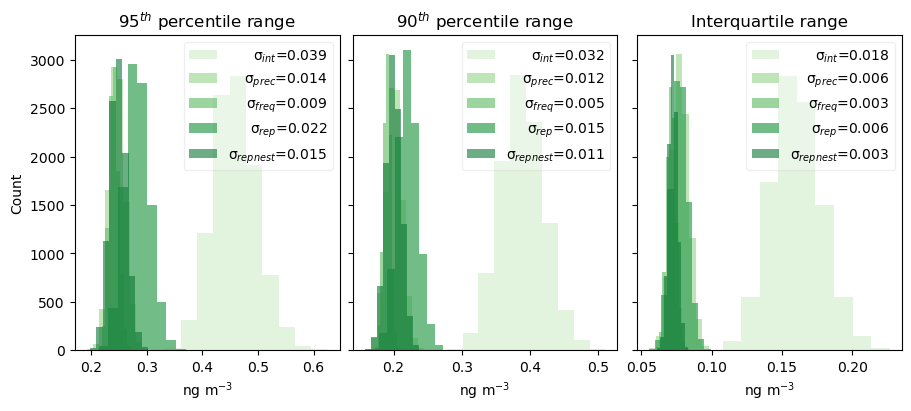

In [59]:
fig,ax=plt.subplots(1,3,figsize=(9,4),layout='constrained',sharey=True)
ax[0].hist(random_IC_95,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_95.std(),3)),color=c[0])
ax[0].hist(random_Pr_95,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_95.std(),3)),color=c[1])
ax[0].hist(random_SF_95,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_95.std(),3)),color=c[2])
ax[0].hist(random_MR_95,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_95.std(),3)),color=c[3])
ax[0].hist(random_MR_n_95,alpha=0.6,label='σ$_{repnest}$='+str(round(random_MR_n_95.std(),3)),color=c[4])
legend0=ax[0].legend(framealpha=0.3)

ax[1].hist(random_IC_90,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_90.std(),3)),color=c[0])
ax[1].hist(random_Pr_90,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_90.std(),3)),color=c[1])
ax[1].hist(random_SF_90,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_90.std(),3)),color=c[2])
ax[1].hist(random_MR_90,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_90.std(),3)),color=c[3])
ax[1].hist(random_MR_n_90,alpha=0.6,label='σ$_{repnest}$='+str(round(random_MR_n_90.std(),3)),color=c[4])
legend1=ax[1].legend(framealpha=0.3)

ax[2].hist(random_IC_IQR,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_IQR.std(),3)),color=c[0])
ax[2].hist(random_Pr_IQR,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_IQR.std(),3)),color=c[1])
ax[2].hist(random_SF_IQR,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_IQR.std(),3)),color=c[2])
ax[2].hist(random_MR_IQR,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_IQR.std(),3)),color=c[3])
ax[2].hist(random_MR_n_IQR,alpha=0.6,label='σ$_{repnest}$='+str(round(random_MR_n_IQR.std(),3)),color=c[4])

legend2=ax[2].legend(framealpha=0.3)
ax[0].set_ylabel('Count')

ax[0].set_xlabel('ng m$^{-3}$')
ax[1].set_xlabel('ng m$^{-3}$')
ax[2].set_xlabel('ng m$^{-3}$')

ax[0].set_title('95$^{th}$ percentile range')
ax[1].set_title('90$^{th}$ percentile range')
ax[2].set_title('Interquartile range')

#ax0.set_title('95$^{th}$ percentile range of random timeseries')

for legend in [legend0,legend1,legend2]:
    renderer = fig.canvas.get_renderer()
    max_shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
    for t in legend.get_texts():
        t.set_ha('right')  # ha is alias for horizontalalignment
        temp_shift = max_shift - t.get_window_extent().width
        t.set_position((temp_shift, 0))
#plt.savefig(figpath+'HF_ErrorDist_3panel.png',dpi=400,transparent=True)
plt.savefig(figpath+'FigS09.'+figformat,dpi=dpi,transparent=True)

In [60]:
#lets do the same thing, now for ATARS. Basically just copying first half of inversion

**Figures S10** - Metric of variability (ATARS, 2014)

In [61]:
GunnPoint = [-12.24912,131.04459]

#user inputs
year =           2014
rolling_period = 60
bounds =         [0,30]
MCMC_iter =      100000

d_start =        str(year)+'-06-01'   #start date
d_end =          str(year)+'-10-01'   #end date (I think this is inclusive, need to confirm)

resample =       '1D'
obs_name =       'conc5_avg'
stat =           'IQR'
model_out_path = '../../Model_data/ATARS/'
precalculated_SF = True
#df_path =        '/home/emroy/GP/ACP/scripts/final/results/PosteriorDistributions/'

#errors (based on Song et al., 2015)
IC_err = 10 #%
Pr_err = 2 #%

#important for model-measurement errors
x_grid = 2.5
y_grid = 2

x_n_grid = 0.625
y_n_grid = 0.5

In [62]:
SamplingFrequency_agg = True
GFED_preprocess = False

obs = f.read_obs('GunnPoint',test=True)
obs = obs.set_index('date')

#outliers on September 9th and 10th right before instrument failure. Removing from dataset.
if year == 2015:
    obs = obs[obs.index<'2015-09-09']

#Base res
ds_bb,df_bb = f.read_gc('GunnPoint',GunnPoint,run='run0018',surf=True)
ds_nobb,df_nobb = f.read_gc('GunnPoint',GunnPoint,run='run0019',surf=True)
ds_nont,df_nont = f.read_gc('GunnPoint',GunnPoint,run='run0038',surf=True)

#Nested res
ds_bb_n,df_bb_n = f.read_gc('GunnPoint',GunnPoint,run='run0022',surf=True)
ds_nobb_n,df_nobb_n = f.read_gc('GunnPoint',GunnPoint,run='run0023',surf=True)
ds_nont_n,df_nont_n = f.read_gc('GunnPoint',GunnPoint,run='run0039',surf=True)

In [63]:
def stilt_sig_read(path):
    df = pd.read_csv(path)
    df['time'] = pd.to_datetime(df['time'])
    return df.set_index('time')

In [64]:
gdas_gfed_df = stilt_sig_read(model_out_path+'STILT/ST_gdas_'+str(year)+'_gfed.csv')
gdas_finn_df = stilt_sig_read(model_out_path+'STILT/ST_gdas_'+str(year)+'_finn.csv')
merra_gfed_df = stilt_sig_read(model_out_path+'STILT/ST_merra_'+str(year)+'_gfed.csv')
merra_finn_df = stilt_sig_read(model_out_path+'STILT/ST_merra_'+str(year)+'_finn.csv')

In [65]:
# --- merge observations and gc, subset for desired period ---
df_bb = df_bb.rename(columns={'conc_ngm3':'bb_ngm-3'})     #renaming concentration
df_bb['nobb_ngm-3'] = df_nobb['conc_ngm3']                 #adding concentration from bb off run
df_bb['nont_ngm-3'] = df_nont['conc_ngm3']                 #adding concentration from bb off run

df_bb['bb_n_ngm-3'] = df_bb_n['conc_ngm3']                   #adding concentration from bb off run
df_bb['nobb_n_ngm-3'] = df_nobb_n['conc_ngm3']               #adding concentration from bb off run
df_bb['nont_n_ngm-3'] = df_nont_n['conc_ngm3']               #adding concentration from bb off run

df_bb['gdas_gfed_ngm-3'] = gdas_gfed_df['gdas_gfed_ngm-3']
df_bb['gdas_finn_ngm-3'] = gdas_finn_df['gdas_finn_ngm-3'] 
df_bb['merra_gfed_ngm-3'] = merra_gfed_df['merra_gfed_ngm-3']
df_bb['merra_finn_ngm-3'] = merra_finn_df['merra_finn_ngm-3']

df_bb = df_bb[df_bb.index>=d_start]
df_bb = df_bb[df_bb.index<=d_end]
df_bb = df_bb.resample('1D').mean()                      #added to account for daily observations

#merge with obs
df_bb = pd.merge(df_bb,obs['conc5_avg'],left_index=True,right_index=True).dropna()

#resample to specified frequency
df_bb = df_bb.resample(resample).mean()
df_bb_roll = df_bb.rolling(rolling_period,min_periods=1,center=True).mean()

#drop na values and detrend
df_bb_nonan = df_bb.dropna()
df_bb_nonan_r = df_bb_roll.loc[df_bb_nonan.index]
df_bb_dt = df_bb_nonan - df_bb_nonan_r                          #Detrended observations and model

In [66]:
stat= '95th'
# --- error calculation --- 

#intercomparison error
std = df_bb_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#precision error
std = df_bb_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

if precalculated_SF == False:
    #sampling frequency error
    dailystd = obs[obs_name].resample('1D').std()
    dailycnt = obs[obs_name].resample('1D').count()
    SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

    SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

    if SamplingFrequency_agg == True:
        std = df_bb_nonan[obs_name]*SF_err_median

    if SamplingFrequency_agg == False:
        std = (df_bb_nonan[obs_name]*SF_err).dropna()

if precalculated_SF == True:
    csv = pd.read_csv('../../Measurement_data/SamplingFrequency.csv').set_index('year')
    std = csv[csv.index==year]['SamplingFrequencyError'].values[0]
    
standard_SF,random_SF = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (standard resolution)
lon = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_t = ds_bb.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))
surf_subset_detrend = ds_bb_t - ds_bb_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err = q_range['SpeciesConcVV_Hg0'].values.std()

std = df_bb_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (nested resolution)
lon = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_n_t = ds_bb_n.sel(lat=slice(lat-y_n_grid,lat+y_n_grid),lon=slice(lon-x_n_grid,lon+x_n_grid))
surf_subset_n_detrend = ds_bb_n_t - ds_bb_n_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err_n = q_range['SpeciesConcVV_Hg0'].values.std()

std_n = df_bb_nonan[obs_name]*MR_err_n
standard_MR_n,random_MR_n = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std_n,statistic=stat)

random_IC_95 = random_IC
random_Pr_95 = random_Pr
random_SF_95 = random_SF
random_MR_95 = random_MR
random_MR_n_95 = random_MR_n

/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise 

In [67]:
stat= '90th'
# --- error calculation --- 

#intercomparison error
std = df_bb_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#precision error
std = df_bb_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

if precalculated_SF == False:
    #sampling frequency error
    dailystd = obs[obs_name].resample('1D').std()
    dailycnt = obs[obs_name].resample('1D').count()
    SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

    SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

    if SamplingFrequency_agg == True:
        std = df_bb_nonan[obs_name]*SF_err_median

    if SamplingFrequency_agg == False:
        std = (df_bb_nonan[obs_name]*SF_err).dropna()

if precalculated_SF == True:
    csv = pd.read_csv('../../Measurement_data/SamplingFrequency.csv').set_index('year')
    std = csv[csv.index==year]['SamplingFrequencyError'].values[0]

standard_SF,random_SF = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (standard resolution)
lon = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_t = ds_bb.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))
surf_subset_detrend = ds_bb_t - ds_bb_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err = q_range['SpeciesConcVV_Hg0'].values.std()

std = df_bb_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (nested resolution)
lon = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_n_t = ds_bb_n.sel(lat=slice(lat-y_n_grid,lat+y_n_grid),lon=slice(lon-x_n_grid,lon+x_n_grid))
surf_subset_n_detrend = ds_bb_n_t - ds_bb_n_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err_n = q_range['SpeciesConcVV_Hg0'].values.std()

std_n = df_bb_nonan[obs_name]*MR_err_n
standard_MR_n,random_MR_n = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std_n,statistic=stat)

random_IC_90 = random_IC
random_Pr_90 = random_Pr
random_SF_90 = random_SF
random_MR_90 = random_MR
random_MR_n_90 = random_MR_n

/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise 

In [68]:
stat= 'IQR'
# --- error calculation --- 

#intercomparison error
std = df_bb_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#precision error
std = df_bb_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

if precalculated_SF == False:
    #sampling frequency error
    dailystd = obs[obs_name].resample('1D').std()
    dailycnt = obs[obs_name].resample('1D').count()
    SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

    SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

    if SamplingFrequency_agg == True:
        std = df_bb_nonan[obs_name]*SF_err_median

    if SamplingFrequency_agg == False:
        std = (df_bb_nonan[obs_name]*SF_err).dropna()

if precalculated_SF == True:
    csv = pd.read_csv('../../Measurement_data/SamplingFrequency.csv').set_index('year')
    std = csv[csv.index==year]['SamplingFrequencyError'].values[0]

standard_SF,random_SF = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (standard resolution)
lon = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_t = ds_bb.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))
surf_subset_detrend = ds_bb_t - ds_bb_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err = q_range['SpeciesConcVV_Hg0'].values.std()

std = df_bb_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (nested resolution)
lon = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_n_t = ds_bb_n.sel(lat=slice(lat-y_n_grid,lat+y_n_grid),lon=slice(lon-x_n_grid,lon+x_n_grid))
surf_subset_n_detrend = ds_bb_n_t - ds_bb_n_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err_n = q_range['SpeciesConcVV_Hg0'].values.std()

std_n = df_bb_nonan[obs_name]*MR_err_n
standard_MR_n,random_MR_n = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std_n,statistic=stat)

random_IC_IQR = random_IC
random_Pr_IQR = random_Pr
random_SF_IQR = random_SF
random_MR_IQR = random_MR
random_MR_n_IQR = random_MR_n

/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise 

In [69]:
c = sns.color_palette('flare',n_colors=5)

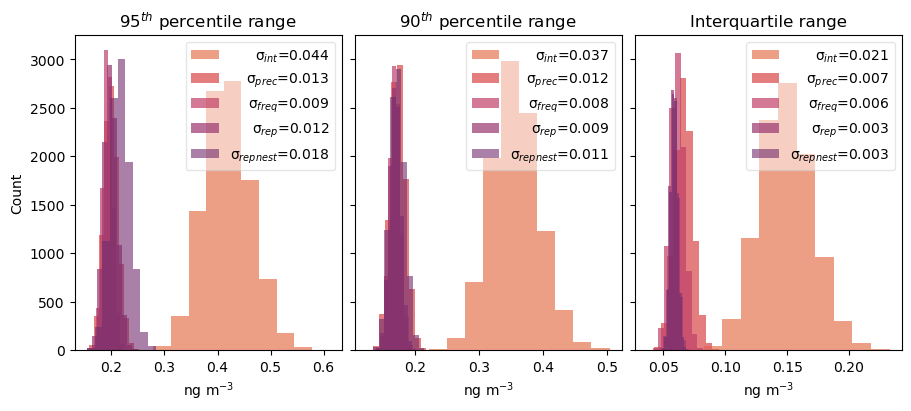

In [70]:
fig,ax=plt.subplots(1,3,figsize=(9,4),layout='constrained',sharey=True)
ax[0].hist(random_IC_95,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_95.std(),3)),color=c[0])
ax[0].hist(random_Pr_95,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_95.std(),3)),color=c[1])
ax[0].hist(random_SF_95,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_95.std(),3)),color=c[2])
ax[0].hist(random_MR_95,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_95.std(),3)),color=c[3])
ax[0].hist(random_MR_n_95,alpha=0.6,label='σ$_{repnest}$='+str(round(random_MR_n_95.std(),3)),color=c[4])
legend0=ax[0].legend(framealpha=0.5)

ax[1].hist(random_IC_90,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_90.std(),3)),color=c[0])
ax[1].hist(random_Pr_90,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_90.std(),3)),color=c[1])
ax[1].hist(random_SF_90,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_90.std(),3)),color=c[2])
ax[1].hist(random_MR_90,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_90.std(),3)),color=c[3])
ax[1].hist(random_MR_n_90,alpha=0.6,label='σ$_{repnest}$='+str(round(random_MR_n_90.std(),3)),color=c[4])
legend1=ax[1].legend(framealpha=0.5)

ax[2].hist(random_IC_IQR,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_IQR.std(),3)),color=c[0])
ax[2].hist(random_Pr_IQR,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_IQR.std(),3)),color=c[1])
ax[2].hist(random_SF_IQR,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_IQR.std(),3)),color=c[2])
ax[2].hist(random_MR_IQR,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_IQR.std(),3)),color=c[3])
ax[2].hist(random_MR_n_IQR,alpha=0.6,label='σ$_{repnest}$='+str(round(random_MR_n_IQR.std(),3)),color=c[4])

legend2=ax[2].legend(framealpha=0.5)
ax[0].set_ylabel('Count')

ax[0].set_xlabel('ng m$^{-3}$')
ax[1].set_xlabel('ng m$^{-3}$')
ax[2].set_xlabel('ng m$^{-3}$')

ax[0].set_title('95$^{th}$ percentile range')
ax[1].set_title('90$^{th}$ percentile range')
ax[2].set_title('Interquartile range')

#ax0.set_title('95$^{th}$ percentile range of random timeseries')

for legend in [legend0,legend1,legend2]:
    renderer = fig.canvas.get_renderer()
    max_shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
    for t in legend.get_texts():
        t.set_ha('right')  # ha is alias for horizontalalignment
        temp_shift = max_shift - t.get_window_extent().width
        t.set_position((temp_shift, 0))

#plt.savefig(figpath+'GP_2014_ErrorDist_3panel.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS10.'+figformat,dpi=dpi,transparent=True)

**Figures S11** - Metric of variability (ATARS, 2015)

In [71]:
GunnPoint = [-12.24912,131.04459]

#user inputs
year =           2015
rolling_period = 60
bounds =         [0,30]
MCMC_iter =      100000

d_start =        str(year)+'-06-01'   #start date
d_end =          str(year)+'-10-01'   #end date (I think this is inclusive, need to confirm)

resample =       '1D'
obs_name =       'conc5_avg'
stat =           'IQR'
model_out_path = '../../Model_data/ATARS/'
precalculated_SF = True
#df_path =        '/home/emroy/GP/ACP/scripts/final/results/PosteriorDistributions/'

#errors (based on Song et al., 2015)
IC_err = 10 #%
Pr_err = 2 #%

#important for model-measurement errors
x_grid = 2.5
y_grid = 2

x_n_grid = 0.625
y_n_grid = 0.5

In [72]:
SamplingFrequency_agg = True
GFED_preprocess = False

obs = f.read_obs('GunnPoint',test=True)
obs = obs.set_index('date')

#outliers on September 9th and 10th right before instrument failure. Removing from dataset.
if year == 2015:
    obs = obs[obs.index<'2015-09-09']

#Base res
ds_bb,df_bb = f.read_gc('GunnPoint',GunnPoint,run='run0018',surf=True)
ds_nobb,df_nobb = f.read_gc('GunnPoint',GunnPoint,run='run0019',surf=True)
ds_nont,df_nont = f.read_gc('GunnPoint',GunnPoint,run='run0038',surf=True)

#Nested res
ds_bb_n,df_bb_n = f.read_gc('GunnPoint',GunnPoint,run='run0022',surf=True)
ds_nobb_n,df_nobb_n = f.read_gc('GunnPoint',GunnPoint,run='run0023',surf=True)
ds_nont_n,df_nont_n = f.read_gc('GunnPoint',GunnPoint,run='run0039',surf=True)

In [73]:
def stilt_sig_read(path):
    df = pd.read_csv(path)
    df['time'] = pd.to_datetime(df['time'])
    return df.set_index('time')

In [74]:
gdas_gfed_df = stilt_sig_read(model_out_path+'STILT/ST_gdas_'+str(year)+'_gfed.csv')
gdas_finn_df = stilt_sig_read(model_out_path+'STILT/ST_gdas_'+str(year)+'_finn.csv')
merra_gfed_df = stilt_sig_read(model_out_path+'STILT/ST_merra_'+str(year)+'_gfed.csv')
merra_finn_df = stilt_sig_read(model_out_path+'STILT/ST_merra_'+str(year)+'_finn.csv')

In [75]:
# --- merge observations and gc, subset for desired period ---
df_bb = df_bb.rename(columns={'conc_ngm3':'bb_ngm-3'})     #renaming concentration
df_bb['nobb_ngm-3'] = df_nobb['conc_ngm3']                 #adding concentration from bb off run
df_bb['nont_ngm-3'] = df_nont['conc_ngm3']                 #adding concentration from bb off run

df_bb['bb_n_ngm-3'] = df_bb_n['conc_ngm3']                   #adding concentration from bb off run
df_bb['nobb_n_ngm-3'] = df_nobb_n['conc_ngm3']               #adding concentration from bb off run
df_bb['nont_n_ngm-3'] = df_nont_n['conc_ngm3']               #adding concentration from bb off run

df_bb['gdas_gfed_ngm-3'] = gdas_gfed_df['gdas_gfed_ngm-3']
df_bb['gdas_finn_ngm-3'] = gdas_finn_df['gdas_finn_ngm-3'] 
df_bb['merra_gfed_ngm-3'] = merra_gfed_df['merra_gfed_ngm-3']
df_bb['merra_finn_ngm-3'] = merra_finn_df['merra_finn_ngm-3']

df_bb = df_bb[df_bb.index>=d_start]
df_bb = df_bb[df_bb.index<=d_end]
df_bb = df_bb.resample('1D').mean()                      #added to account for daily observations

#merge with obs
df_bb = pd.merge(df_bb,obs['conc5_avg'],left_index=True,right_index=True).dropna()

#resample to specified frequency
df_bb = df_bb.resample(resample).mean()
df_bb_roll = df_bb.rolling(rolling_period,min_periods=1,center=True).mean()

#drop na values and detrend
df_bb_nonan = df_bb.dropna()
df_bb_nonan_r = df_bb_roll.loc[df_bb_nonan.index]
df_bb_dt = df_bb_nonan - df_bb_nonan_r                          #Detrended observations and model

In [76]:
stat= '95th'
# --- error calculation --- 

#intercomparison error
std = df_bb_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#precision error
std = df_bb_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

if precalculated_SF == False:
    #sampling frequency error
    dailystd = obs[obs_name].resample('1D').std()
    dailycnt = obs[obs_name].resample('1D').count()
    SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

    SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

    if SamplingFrequency_agg == True:
        std = df_bb_nonan[obs_name]*SF_err_median

    if SamplingFrequency_agg == False:
        std = (df_bb_nonan[obs_name]*SF_err).dropna()

if precalculated_SF == True:
    csv = pd.read_csv('../../Measurement_data/SamplingFrequency.csv').set_index('year')
    std = csv[csv.index==year]['SamplingFrequencyError'].values[0]
    
standard_SF,random_SF = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (standard resolution)
lon = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_t = ds_bb.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))
surf_subset_detrend = ds_bb_t - ds_bb_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err = q_range['SpeciesConcVV_Hg0'].values.std()

std = df_bb_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (nested resolution)
lon = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_n_t = ds_bb_n.sel(lat=slice(lat-y_n_grid,lat+y_n_grid),lon=slice(lon-x_n_grid,lon+x_n_grid))
surf_subset_n_detrend = ds_bb_n_t - ds_bb_n_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err_n = q_range['SpeciesConcVV_Hg0'].values.std()

std_n = df_bb_nonan[obs_name]*MR_err_n
standard_MR_n,random_MR_n = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std_n,statistic=stat)

random_IC_95 = random_IC
random_Pr_95 = random_Pr
random_SF_95 = random_SF
random_MR_95 = random_MR
random_MR_n_95 = random_MR_n

/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise 

In [77]:
stat= '90th'
# --- error calculation --- 

#intercomparison error
std = df_bb_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#precision error
std = df_bb_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

if precalculated_SF == False:
    #sampling frequency error
    dailystd = obs[obs_name].resample('1D').std()
    dailycnt = obs[obs_name].resample('1D').count()
    SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

    SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

    if SamplingFrequency_agg == True:
        std = df_bb_nonan[obs_name]*SF_err_median

    if SamplingFrequency_agg == False:
        std = (df_bb_nonan[obs_name]*SF_err).dropna()

if precalculated_SF == True:
    csv = pd.read_csv('../../Measurement_data/SamplingFrequency.csv').set_index('year')
    std = csv[csv.index==year]['SamplingFrequencyError'].values[0]

standard_SF,random_SF = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (standard resolution)
lon = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_t = ds_bb.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))
surf_subset_detrend = ds_bb_t - ds_bb_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err = q_range['SpeciesConcVV_Hg0'].values.std()

std = df_bb_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (nested resolution)
lon = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_n_t = ds_bb_n.sel(lat=slice(lat-y_n_grid,lat+y_n_grid),lon=slice(lon-x_n_grid,lon+x_n_grid))
surf_subset_n_detrend = ds_bb_n_t - ds_bb_n_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err_n = q_range['SpeciesConcVV_Hg0'].values.std()

std_n = df_bb_nonan[obs_name]*MR_err_n
standard_MR_n,random_MR_n = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std_n,statistic=stat)

random_IC_90 = random_IC
random_Pr_90 = random_Pr
random_SF_90 = random_SF
random_MR_90 = random_MR
random_MR_n_90 = random_MR_n

/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise 

In [78]:
stat= 'IQR'
# --- error calculation --- 

#intercomparison error
std = df_bb_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#precision error
std = df_bb_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

if precalculated_SF == False:
    #sampling frequency error
    dailystd = obs[obs_name].resample('1D').std()
    dailycnt = obs[obs_name].resample('1D').count()
    SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

    SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

    if SamplingFrequency_agg == True:
        std = df_bb_nonan[obs_name]*SF_err_median

    if SamplingFrequency_agg == False:
        std = (df_bb_nonan[obs_name]*SF_err).dropna()

if precalculated_SF == True:
    csv = pd.read_csv('../../Measurement_data/SamplingFrequency.csv').set_index('year')
    std = csv[csv.index==year]['SamplingFrequencyError'].values[0]

standard_SF,random_SF = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (standard resolution)
lon = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_t = ds_bb.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))
surf_subset_detrend = ds_bb_t - ds_bb_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err = q_range['SpeciesConcVV_Hg0'].values.std()

std = df_bb_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std,statistic=stat)

#Measurement-model representation error (nested resolution)
lon = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds_bb_n.sel(lon=GunnPoint[1],lat=GunnPoint[0],method='nearest').lat.values)[0]

ds_bb_n_t = ds_bb_n.sel(lat=slice(lat-y_n_grid,lat+y_n_grid),lon=slice(lon-x_n_grid,lon+x_n_grid))
surf_subset_n_detrend = ds_bb_n_t - ds_bb_n_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_n_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err_n = q_range['SpeciesConcVV_Hg0'].values.std()

std_n = df_bb_nonan[obs_name]*MR_err_n
standard_MR_n,random_MR_n = f.bootstrap_4_statistic(df_bb_nonan[obs_name],df_bb_nonan_r[obs_name],std_n,statistic=stat)

random_IC_IQR = random_IC
random_Pr_IQR = random_Pr
random_SF_IQR = random_SF
random_MR_IQR = random_MR
random_MR_n_IQR = random_MR_n

/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise 

In [79]:
c = sns.color_palette('flare',n_colors=5)

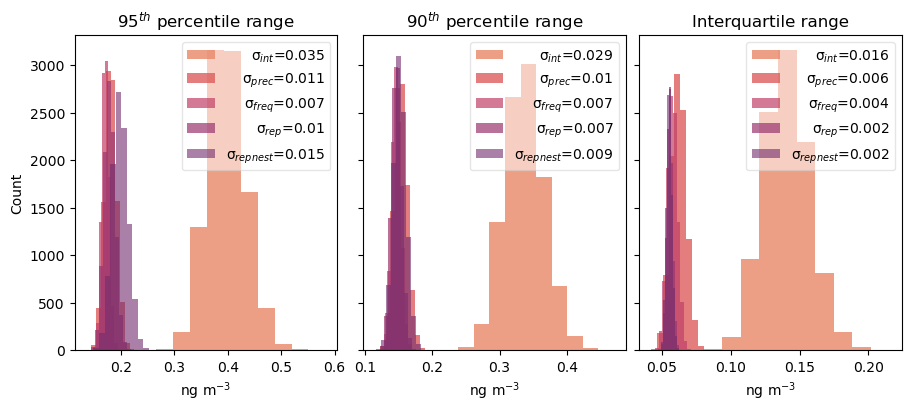

In [80]:
fig,ax=plt.subplots(1,3,figsize=(9,4),layout='constrained',sharey=True)
ax[0].hist(random_IC_95,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_95.std(),3)),color=c[0])
ax[0].hist(random_Pr_95,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_95.std(),3)),color=c[1])
ax[0].hist(random_SF_95,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_95.std(),3)),color=c[2])
ax[0].hist(random_MR_95,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_95.std(),3)),color=c[3])
ax[0].hist(random_MR_n_95,alpha=0.6,label='σ$_{repnest}$='+str(round(random_MR_n_95.std(),3)),color=c[4])
legend0=ax[0].legend(framealpha=0.5)

ax[1].hist(random_IC_90,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_90.std(),3)),color=c[0])
ax[1].hist(random_Pr_90,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_90.std(),3)),color=c[1])
ax[1].hist(random_SF_90,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_90.std(),3)),color=c[2])
ax[1].hist(random_MR_90,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_90.std(),3)),color=c[3])
ax[1].hist(random_MR_n_90,alpha=0.6,label='σ$_{repnest}$='+str(round(random_MR_n_90.std(),3)),color=c[4])
legend1=ax[1].legend(framealpha=0.5)

ax[2].hist(random_IC_IQR,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_IQR.std(),3)),color=c[0])
ax[2].hist(random_Pr_IQR,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_IQR.std(),3)),color=c[1])
ax[2].hist(random_SF_IQR,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_IQR.std(),3)),color=c[2])
ax[2].hist(random_MR_IQR,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_IQR.std(),3)),color=c[3])
ax[2].hist(random_MR_n_IQR,alpha=0.6,label='σ$_{repnest}$='+str(round(random_MR_n_IQR.std(),3)),color=c[4])

legend2=ax[2].legend(framealpha=0.5)
ax[0].set_ylabel('Count')

ax[0].set_xlabel('ng m$^{-3}$')
ax[1].set_xlabel('ng m$^{-3}$')
ax[2].set_xlabel('ng m$^{-3}$')

ax[0].set_title('95$^{th}$ percentile range')
ax[1].set_title('90$^{th}$ percentile range')
ax[2].set_title('Interquartile range')

#ax0.set_title('95$^{th}$ percentile range of random timeseries')

for legend in [legend0,legend1,legend2]:
    renderer = fig.canvas.get_renderer()
    max_shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
    for t in legend.get_texts():
        t.set_ha('right')  # ha is alias for horizontalalignment
        temp_shift = max_shift - t.get_window_extent().width
        t.set_position((temp_shift, 0))

#plt.savefig(figpath+'GP_2015_ErrorDist_3panel.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS11.'+figformat,dpi=dpi,transparent=True)

**Figures S12** - Metric of variability (Chacaltaya)

In [81]:
#now, chacaltaya
Chacaltaya = [-16.35352,-68.13150]

# ------- user inputs -------
d_start =        '2014-11-01' #start date
d_end =          '2015-06-30' #end date (I think this is inclusive, need to confirm)
resample =       '1D'         #averaging interval
obs_name =       'TGM_valid'  #measured concentration column name
stat =           'IQR'       #95th percentile range
rolling_period = 60           #days
MCMC_iter =      100000
bounds =         [0,70] 
proposal_std =   10
#df_path =        '/home/emroy/GP/ACP/scripts/final/results/PosteriorDistributions/'
Convolve =       False       # If convolve is true, stilt sensitivities will be convolved with emissions and exported to /home/emroy/GP/ACP/scripts/final/data/STILT/Results
stilt_path =     '../../Model_data/CHC/STILT' #'/home/emroy/GP/ACP/scripts/final/data/STILT/Chacaltaya/'
stilt_hours =    24

#errors (based on Song et al., 2015)
IC_err = 10 #%
Pr_err = 2 #%

#important for model-measurement errors
x_grid = 2.5
y_grid = 2

SamplingFrequency_agg = False


In [82]:
obs = pd.DataFrame(f.read_obs('Chacaltaya'))
obs = obs.loc[d_start:d_end]
ds,df = f.read_gc('Chacaltaya',Chacaltaya)
scalars,regions,region_names = f.read_asgm_ems(d_start=d_start,d_end=d_end)
df = df.resample('1D').mean()

#merging gc and obs
obs_gc = pd.merge(df,obs.resample('1D').mean(),left_index=True,right_index=True)
obs_gc_roll = obs_gc.rolling(rolling_period,min_periods=1,center=True).mean()
obs_gc_nonan = obs_gc.dropna(subset=[obs_name])
obs_gc_nonan_r = obs_gc_roll.loc[obs_gc_nonan.index]
obs_gc_dt = obs_gc_nonan - obs_gc_nonan_r                          #Detrended observations and model

#converting scalars using number of days considered for this test

spun_sig = f.signal_asgm(obs_gc_dt['base'],obs_gc_dt['spun'],scalars,region='spun')
npun_sig = f.signal_asgm(obs_gc_dt['base'],obs_gc_dt['npun'],scalars,region='npun')
mdd_sig = f.signal_asgm(obs_gc_dt['base'],obs_gc_dt['mdd'],scalars,region='mdd')
aqp_sig = f.signal_asgm(obs_gc_dt['base'],obs_gc_dt['aqp'],scalars,region='aqp')
apr_sig = f.signal_asgm(obs_gc_dt['base'],obs_gc_dt['apr'],scalars,region='apr')
obs_gc_dt['AllRegions'] = spun_sig+npun_sig+mdd_sig+aqp_sig+apr_sig


# --- Read emission datasets for STILT ---

GMA = xr.open_dataset('../../Model_data/CHC/Priors/GMA_emissions_Hg.0.25x0.25.2015.nc')
ED10 = xr.open_dataset('../../Model_data/CHC/Priors/EDGAR_gold_A_2010_Hg.nc')

#gridbox area for respective runs
GMA_area = xr.open_dataset('../../Model_data/CHC/Priors/gma_gridarea.nc')
ED4p1_area = xr.open_dataset('../../Model_data/CHC/Priors/Edgarv4p1_gridarea.nc')

/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise 

In [83]:
model_out_path = '../../Model_data/CHC/'
gma_merra_contrib = xr.open_dataset(model_out_path+'STILT/gma_merra.nc4')
ed10_merra_contrib = xr.open_dataset(model_out_path+'STILT/ed10_merra.nc4')   
gma_gdas_contrib = xr.open_dataset(model_out_path+'STILT/gma_gdas.nc4')
ed10_gdas_contrib = xr.open_dataset(model_out_path+'STILT/ed10_gdas.nc4')


# --- Calculating prior emissions for the number of days considered in obs ---

days = (pd.to_datetime(d_end)-pd.to_datetime(d_start)).days #gma_gdas_contrib.sortby('time').resample(time='1D').mean().time.size

gma_spuno,gma_npuno,gma_mdd,gma_are,gma_apu = f.asgm_regions(f.unit_convert_asgm(GMA,GMA_area,days=days,Mg=True))
ed10_spuno,ed10_npuno,ed10_mdd,ed10_are,ed10_apu = f.asgm_regions(f.unit_convert_asgm(ED10,ED4p1_area,var='emi_hg_g',days=days,Mg=True))

# --- Calculating STILT concentration signal for each respective region ---

gma_merra_spuno,gma_merra_npuno,gma_merra_mdd,gma_merra_are,gma_merra_apu = f.asgm_regions(gma_merra_contrib['emi_hg_0_asgm'].sortby('time'),EDGAR_8p1=True)
gma_gdas_spuno,gma_gdas_npuno,gma_gdas_mdd,gma_gdas_are,gma_gdas_apu = f.asgm_regions(gma_gdas_contrib['emi_hg_0_asgm'].sortby('time'),EDGAR_8p1=True)

ed10_merra_spuno,ed10_merra_npuno,ed10_merra_mdd,ed10_merra_are,ed10_merra_apu = f.asgm_regions(ed10_merra_contrib['emi_hg_g'].sortby('time'),EDGAR_8p1=True)
ed10_gdas_spuno,ed10_gdas_npuno,ed10_gdas_mdd,ed10_gdas_are,ed10_gdas_apu = f.asgm_regions(ed10_gdas_contrib['emi_hg_g'].sortby('time'),EDGAR_8p1=True)

# --- Defining STILT signals ---

spun_sig_merra_gma = f.signal_asgm_stilt(gma_merra_spuno,gma_spuno).resample('1D').mean()['emi_hg_0_asgm']
npun_sig_merra_gma = f.signal_asgm_stilt(gma_merra_npuno,gma_npuno).resample('1D').mean()['emi_hg_0_asgm']
mdd_sig_merra_gma = f.signal_asgm_stilt(gma_merra_mdd,gma_mdd).resample('1D').mean()['emi_hg_0_asgm']
are_sig_merra_gma = f.signal_asgm_stilt(gma_merra_are,gma_are).resample('1D').mean()['emi_hg_0_asgm']
apu_sig_merra_gma = f.signal_asgm_stilt(gma_merra_apu,gma_apu).resample('1D').mean()['emi_hg_0_asgm']

spun_sig_gdas_gma = f.signal_asgm_stilt(gma_gdas_spuno,gma_spuno).resample('1D').mean()['emi_hg_0_asgm']
npun_sig_gdas_gma = f.signal_asgm_stilt(gma_gdas_npuno,gma_npuno).resample('1D').mean()['emi_hg_0_asgm']
mdd_sig_gdas_gma = f.signal_asgm_stilt(gma_gdas_mdd,gma_mdd).resample('1D').mean()['emi_hg_0_asgm']
are_sig_gdas_gma = f.signal_asgm_stilt(gma_gdas_are,gma_are).resample('1D').mean()['emi_hg_0_asgm']
apu_sig_gdas_gma = f.signal_asgm_stilt(gma_gdas_apu,gma_apu).resample('1D').mean()['emi_hg_0_asgm']

spun_sig_merra_ed10 = f.signal_asgm_stilt(ed10_merra_spuno,ed10_spuno).resample('1D').mean()['emi_hg_g']
npun_sig_merra_ed10 = f.signal_asgm_stilt(ed10_merra_npuno,ed10_npuno).resample('1D').mean()['emi_hg_g']
mdd_sig_merra_ed10 = f.signal_asgm_stilt(ed10_merra_mdd,ed10_mdd).resample('1D').mean()['emi_hg_g']
are_sig_merra_ed10 = f.signal_asgm_stilt(ed10_merra_are,ed10_are).resample('1D').mean()['emi_hg_g']
apu_sig_merra_ed10 = f.signal_asgm_stilt(ed10_merra_apu,ed10_apu).resample('1D').mean()['emi_hg_g']

spun_sig_gdas_ed10 = f.signal_asgm_stilt(ed10_gdas_spuno,ed10_spuno).resample('1D').mean()['emi_hg_g']
npun_sig_gdas_ed10 = f.signal_asgm_stilt(ed10_gdas_npuno,ed10_npuno).resample('1D').mean()['emi_hg_g']
mdd_sig_gdas_ed10 = f.signal_asgm_stilt(ed10_gdas_mdd,ed10_mdd).resample('1D').mean()['emi_hg_g']
are_sig_gdas_ed10 = f.signal_asgm_stilt(ed10_gdas_are,ed10_are).resample('1D').mean()['emi_hg_g']
apu_sig_gdas_ed10 = f.signal_asgm_stilt(ed10_gdas_apu,ed10_apu).resample('1D').mean()['emi_hg_g']

In [84]:
stat = '95th'

# --- Calculating errors ---

###error calculation###

#intercomparison error
std = obs_gc_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#precision error
std = obs_gc_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#sampling frequency error
dailystd = obs[obs_name].resample('1D').std()
dailycnt = obs[obs_name].resample('1D').count()
SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

if SamplingFrequency_agg == True:
    std = obs_gc_nonan[obs_name]*SF_err_median

if SamplingFrequency_agg == False:
    std = (obs_gc_nonan[obs_name]*SF_err).dropna()

standard_SF,random_SF = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)


#Measurement-model representation error

lon = np.atleast_1d(ds.sel(lon=Chacaltaya[1],lat=Chacaltaya[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds.sel(lon=Chacaltaya[1],lat=Chacaltaya[0],method='nearest').lat.values)[0]

ds_t = ds.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))['SpeciesConc_Hg0']
surf_subset_detrend = ds_t - ds_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err = q_range.values.std()

std = obs_gc_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

random_IC_95 = random_IC
random_Pr_95 = random_Pr
random_SF_95 = random_SF
random_MR_95 = random_MR

/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise 

In [85]:
stat = '90th'

# --- Calculating errors ---

###error calculation###

#intercomparison error
std = obs_gc_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#precision error
std = obs_gc_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#sampling frequency error
dailystd = obs[obs_name].resample('1D').std()
dailycnt = obs[obs_name].resample('1D').count()
SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

if SamplingFrequency_agg == True:
    std = obs_gc_nonan[obs_name]*SF_err_median

if SamplingFrequency_agg == False:
    std = (obs_gc_nonan[obs_name]*SF_err).dropna()

standard_SF,random_SF = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)


#Measurement-model representation error

lon = np.atleast_1d(ds.sel(lon=Chacaltaya[1],lat=Chacaltaya[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds.sel(lon=Chacaltaya[1],lat=Chacaltaya[0],method='nearest').lat.values)[0]

ds_t = ds.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))['SpeciesConc_Hg0']
surf_subset_detrend = ds_t - ds_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err = q_range.values.std()

std = obs_gc_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

random_IC_90 = random_IC
random_Pr_90 = random_Pr
random_SF_90 = random_SF
random_MR_90 = random_MR

/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise 

In [86]:
stat = 'IQR'

# --- Calculating errors ---

###error calculation###

#intercomparison error
std = obs_gc_nonan[obs_name]*(IC_err/100) #calculates sigma (standard deviation)
standard_IC,random_IC = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#precision error
std = obs_gc_nonan[obs_name]*(Pr_err/100) #calculates sigma (standard deviation)
standard_Pr,random_Pr = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

#sampling frequency error
dailystd = obs[obs_name].resample('1D').std()
dailycnt = obs[obs_name].resample('1D').count()
SF_err = dailystd/np.sqrt(dailycnt) #updated calculation based on Rigby et al., 2012 and Chen and Prinn (2006)

SF_err_median = SF_err.median() #Using median, as mean would be a biased representation of the data

if SamplingFrequency_agg == True:
    std = obs_gc_nonan[obs_name]*SF_err_median

if SamplingFrequency_agg == False:
    std = (obs_gc_nonan[obs_name]*SF_err).dropna()

standard_SF,random_SF = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)


#Measurement-model representation error

lon = np.atleast_1d(ds.sel(lon=Chacaltaya[1],lat=Chacaltaya[0],method='nearest').lon.values)[0]
lat = np.atleast_1d(ds.sel(lon=Chacaltaya[1],lat=Chacaltaya[0],method='nearest').lat.values)[0]

ds_t = ds.sel(lat=slice(lat-y_grid,lat+y_grid),lon=slice(lon-x_grid,lon+x_grid))['SpeciesConc_Hg0']
surf_subset_detrend = ds_t - ds_t.rolling(time=rolling_period,center=True,min_periods=1).mean()

if stat == '95th':
    q025 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.025,dim='time')
    q975 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.975,dim='time')

    q_range = q975-q025

if stat == '90th':
    q05 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.05,dim='time')
    q95 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.95,dim='time')

    q_range = q95-q05

if stat == '75th':
    q125 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.125,dim='time')
    q875 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.875,dim='time')

    q_range = q875-q125

if stat == 'IQR':
    q25 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.25,dim='time')
    q75 = surf_subset_detrend.chunk({"time": -1}).quantile(q=.75,dim='time')

    q_range = q75-q25

MR_err = q_range.values.std()

std = obs_gc_nonan[obs_name]*MR_err
standard_MR,random_MR = f.bootstrap_4_statistic(obs_gc_nonan[obs_name],obs_gc_nonan_r[obs_name],std,statistic=stat)

random_IC_IQR = random_IC
random_Pr_IQR = random_Pr
random_SF_IQR = random_SF
random_MR_IQR = random_MR

/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/emroy/.conda/envs/geos_22/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise 

In [87]:
c = sns.color_palette("blend:#FDEBBA,#DEA81D",n_colors=4)

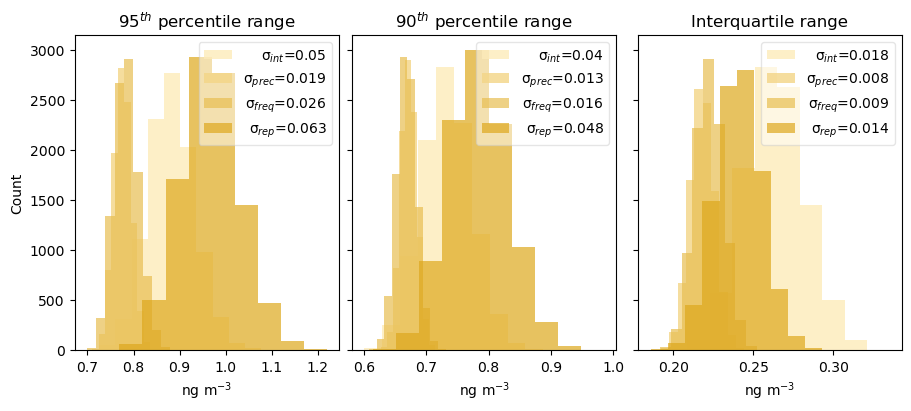

In [88]:
fig,ax=plt.subplots(1,3,figsize=(9,4),layout='constrained',sharey=True)
ax[0].hist(random_IC_95,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_95.std(),3)),color=c[0])
ax[0].hist(random_Pr_95,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_95.std(),3)),color=c[1])
ax[0].hist(random_SF_95,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_95.std(),3)),color=c[2])
ax[0].hist(random_MR_95,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_95.std(),3)),color=c[3])
legend0=ax[0].legend(framealpha=0.5)

ax[1].hist(random_IC_90,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_90.std(),3)),color=c[0])
ax[1].hist(random_Pr_90,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_90.std(),3)),color=c[1])
ax[1].hist(random_SF_90,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_90.std(),3)),color=c[2])
ax[1].hist(random_MR_90,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_90.std(),3)),color=c[3])
legend1=ax[1].legend(framealpha=0.5)

ax[2].hist(random_IC_IQR,alpha=0.8,label='σ$_{int}$='+str(round(random_IC_IQR.std(),3)),color=c[0])
ax[2].hist(random_Pr_IQR,alpha=0.8,label='σ$_{prec}$='+str(round(random_Pr_IQR.std(),3)),color=c[1])
ax[2].hist(random_SF_IQR,alpha=0.7,label='σ$_{freq}$='+str(round(random_SF_IQR.std(),3)),color=c[2])
ax[2].hist(random_MR_IQR,alpha=0.7,label='σ$_{rep}$='+str(round(random_MR_IQR.std(),3)),color=c[3])
legend2=ax[2].legend(framealpha=0.5)

ax[0].set_ylabel('Count')
ax[0].set_xlabel('ng m$^{-3}$')
ax[1].set_xlabel('ng m$^{-3}$')
ax[2].set_xlabel('ng m$^{-3}$')

ax[0].set_title('95$^{th}$ percentile range')
ax[1].set_title('90$^{th}$ percentile range')
ax[2].set_title('Interquartile range')

#ax0.set_title('95$^{th}$ percentile range of random timeseries')

for legend in [legend0,legend1,legend2]:
    renderer = fig.canvas.get_renderer()
    max_shift = max([t.get_window_extent(renderer).width for t in legend.get_texts()])
    for t in legend.get_texts():
        t.set_ha('right')  # ha is alias for horizontalalignment
        temp_shift = max_shift - t.get_window_extent().width
        t.set_position((temp_shift, 0))

#plt.savefig(figpath+'CH_ErrorDist_3panel.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS12.'+figformat,dpi=dpi,transparent=True)

**Figure S13** - Map of IBRA, made in R (code available upon request)

**Figure S14** - Posterior distribution for Arequipa region (95th pctile range)

In [89]:
#read in Harvard Forest posteriors
cols = ['mdd','apu','are','npun','spun']

gc_95 = pd.read_csv('../posteriors/Chacaltaya_gcbase_95th.csv',usecols=cols)
merragma_95 = pd.read_csv('../posteriors/Chacaltaya_merragma_95th.csv',usecols=cols)
gdasgma_95 = pd.read_csv('../posteriors/Chacaltaya_gdasgma_95th.csv',usecols=cols)
merraed10_95 = pd.read_csv('../posteriors/Chacaltaya_merraed10_95th.csv',usecols=cols)
gdased10_95 = pd.read_csv('../posteriors/Chacaltaya_gdased10_95th.csv',usecols=cols)

#read priors
priors = pd.read_csv('../posteriors/Chacaltaya_priors.csv')

In [90]:
#to make this plot the way I want it, need to make function to add column with percentile
def percentile_value(df,run,value,decimals=3):
    return np.round((df[run]>value).sum()/len(df[run]),decimals)
    #return (sorted(df[df['variable']==run]['posterior'])>value).sum()/len(df[df['variable']==run]['posterior'])

def loc_compile(dflist,namelist,loc='mdd'):
    i = 0
    for df in dflist:
        if i == 0:
            df_comp = pd.DataFrame({namelist[i]:df[loc]})
        else:
            df_comp[namelist[i]] = df[loc]
        i = i+1
    return df_comp
     

In [91]:
dflist =   [gc_95,merragma_95,gdasgma_95,merraed10_95,gdased10_95]
namelist = ['gc','merragma','gdasgma','merraed10','gdased10']

mdd = loc_compile(dflist,namelist,loc='mdd')
apu = loc_compile(dflist,namelist,loc='apu')
are = loc_compile(dflist,namelist,loc='are')
npun = loc_compile(dflist,namelist,loc='npun')
spun = loc_compile(dflist,namelist,loc='spun')
allregions = spun+npun+are+apu+mdd


In [92]:
#all regions
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','STILT-MERRA2-GMA','STILT-GDAS-GMA','STILT-MERRA2-ED10','STILT-GDAS-ED10']
model_subnames = ['2°x2.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°']

#figure parameters
textheight=7500
textloc=3.5 #-22
fontsize=12
fontspace=1700
priorheight=0.45
priorlinewidth=2
pctileheight=6000
x_label='ASGM Emissions (Mg)'

#colors
pal = sns.color_palette("blend:#FDEBBA,#DEA81D",6)#sns.cubehelix_palette(6,start=1.35, rot=0,light=0.7)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors['gc'].sum(),priors['ed10'].sum()]#,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

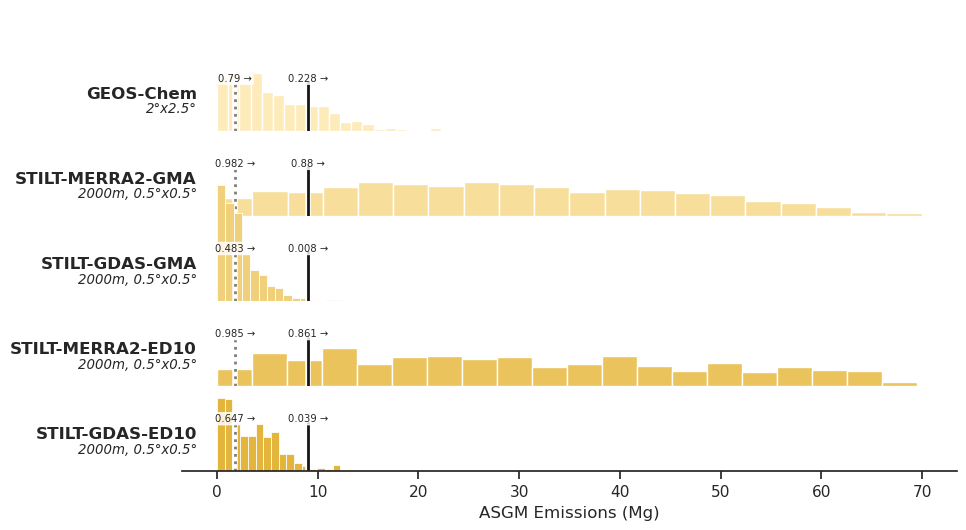

In [93]:
posterior_df = are.copy()

textheight=10000
textloc=-2 #-22
fontsize=12
fontspace=3500
priorheight=0.4
priorlinewidth=2
pctileheight=11000

#prior information
prior_flux = [priors[priors['regions']=='are']['gc'].values[0],priors[priors['regions']=='are']['ed10'].sum()] #,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
 
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.3)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

#plt.savefig(figpath+'Chacaltaya_are_95th_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')
plt.savefig(figpath+'FigS14.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')

plt.show()
plt.close()


**Figure S15** - Posterior distribution for Apurimac/Cusco region (95th pctile range)

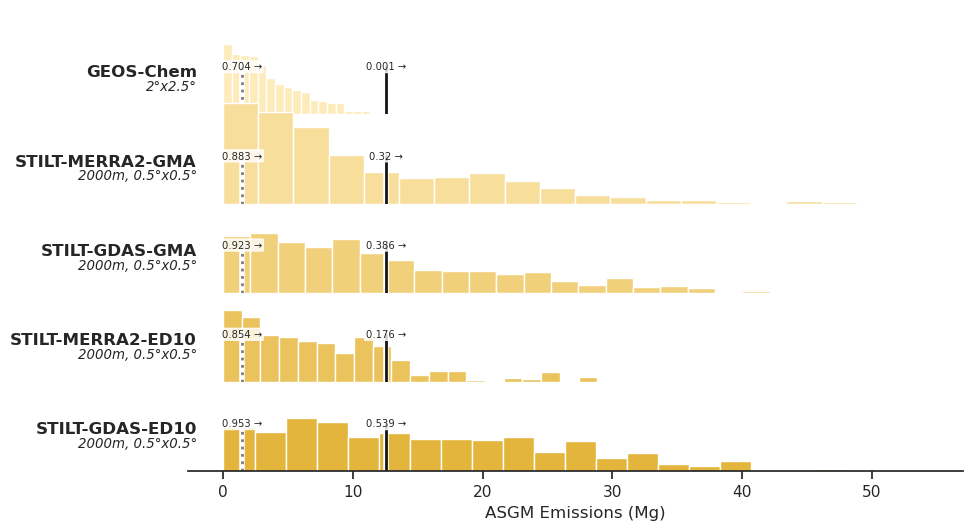

In [94]:
posterior_df = apu.copy()

#figure parameters
textheight=10000
textloc=-2 #-22
fontsize=12
fontspace=3000
priorheight=0.45
priorlinewidth=2
pctileheight=9000

#prior information
prior_flux = [priors[priors['regions']=='apu']['gc'].values[0],priors[priors['regions']=='apu']['ed10'].sum()] #,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
 
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.15)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

#plt.savefig(figpath+'Chacaltaya_apu_95th_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')
plt.savefig(figpath+'FigS15.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')

plt.show()
plt.close()


**Figure S16** - Posterior distribution for North Puno region (95th pctile range)

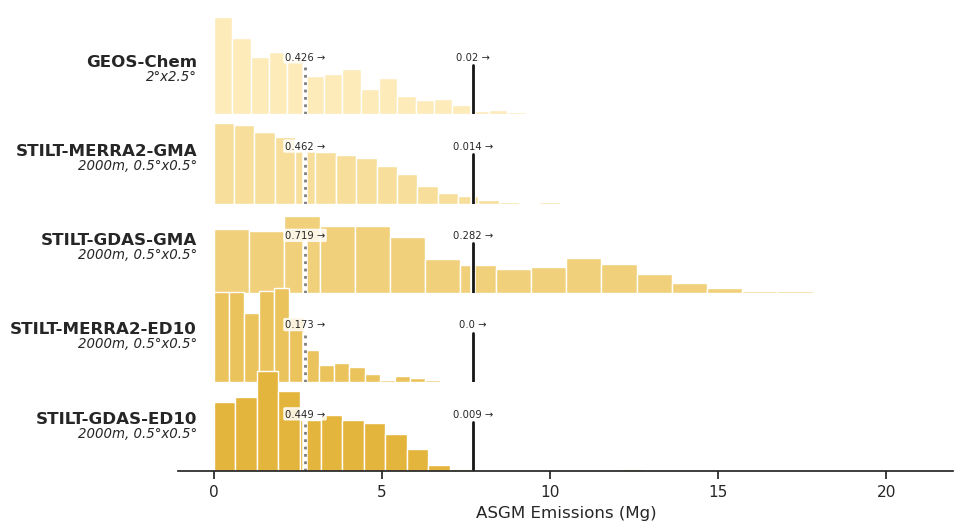

In [95]:
posterior_df = npun.copy()

#figure parameters
textheight=10000
textloc=-0.5 #-22
fontsize=12
fontspace=2500
priorheight=0.47
priorlinewidth=2
pctileheight=9000

#prior information
prior_flux = [priors[priors['regions']=='npun']['gc'].values[0],priors[priors['regions']=='npun']['ed10'].sum()] #,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
 
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.15)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

#plt.savefig(figpath+'Chacaltaya_npun_95th_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')
plt.savefig(figpath+'FigS16.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')
plt.show()
plt.close()


**Figure S17** - Posterior distribution for South Puno region (95th pctile range)

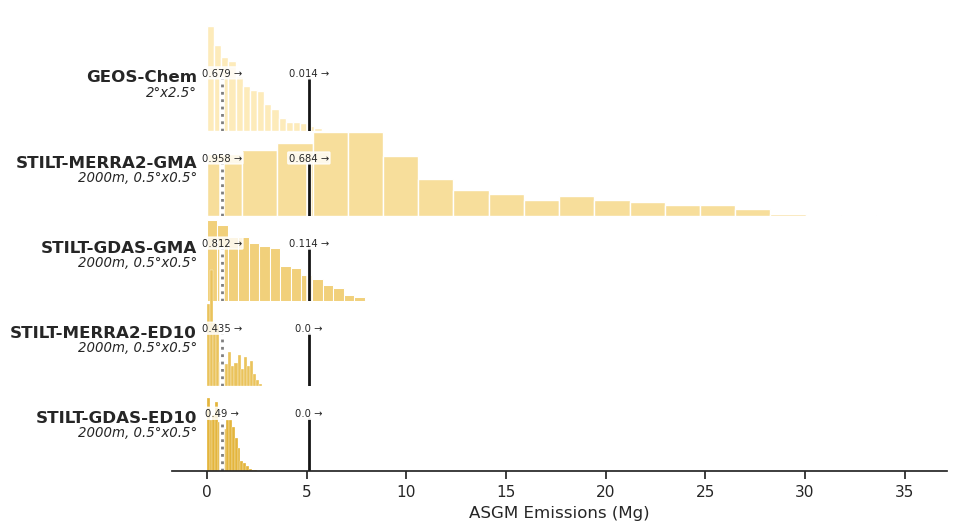

In [96]:
posterior_df = spun.copy()

#figure parameters
textheight=10000
textloc=-0.5 #-22
fontsize=12
fontspace=2500
priorheight=0.43
priorlinewidth=2
pctileheight=9000

#prior information
prior_flux = [priors[priors['regions']=='spun']['gc'].values[0],priors[priors['regions']=='spun']['ed10'].sum()] #,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
 
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.3)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

#plt.savefig(figpath+'Chacaltaya_spun_95th_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')
plt.savefig(figpath+'FigS17.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')

plt.show()
plt.close()


**Figure S18** - Harvard Forest posterior distributions for 90th pctile range, IQR 

In [97]:
#read in Harvard Forest posteriors
cols = ['gc','gc_n','gfs_5m','merra_250m','nam_250m']

posterior_df_90 = pd.read_csv('../posteriors/HarvardForest_posterior_90th.csv',usecols=cols)
posterior_df_50 = pd.read_csv('../posteriors/HarvardForest_posterior_IQR.csv',usecols=cols)

In [98]:
#to make this plot the way I want it, need to make function to add column with percentile
def percentile_value(df,run,value,decimals=3):
    return np.round((df[run]>value).sum()/len(df[run]),decimals)
    #return (sorted(df[df['variable']==run]['posterior'])>value).sum()/len(df[df['variable']==run]['posterior'])


In [99]:
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','GEOS-Chem','STILT-GFS','STILT-MERRA2','STILT-NAM']
model_subnames = ['2°x2.5°','0.5°x0.625°','5m, 0.25°x0.25°','30m, 0.5°x0.5°','30m, 0.1°x0.1°']

#figure parameters
fontspace=950
x_label='Dry Deposition (ug m$^{-2}$)'

#colors
pal = sns.cubehelix_palette(6,start=1.95, rot=0,light=0.7)#sns.cubehelix_palette(10, rot=-.25, light=.7)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [21.9,9.894,8.1]#,period_litterfall] #calculated Obrist growing season uptake: 19.775
prior_flux_n = [21.9,12.556,8.1] #calculated Obrist growing season uptake: 19.775
prior_clrs = [gry[10],gry[7],gry[5]]#,gry[3]]
prior_style = ['-','--',':']#,':']

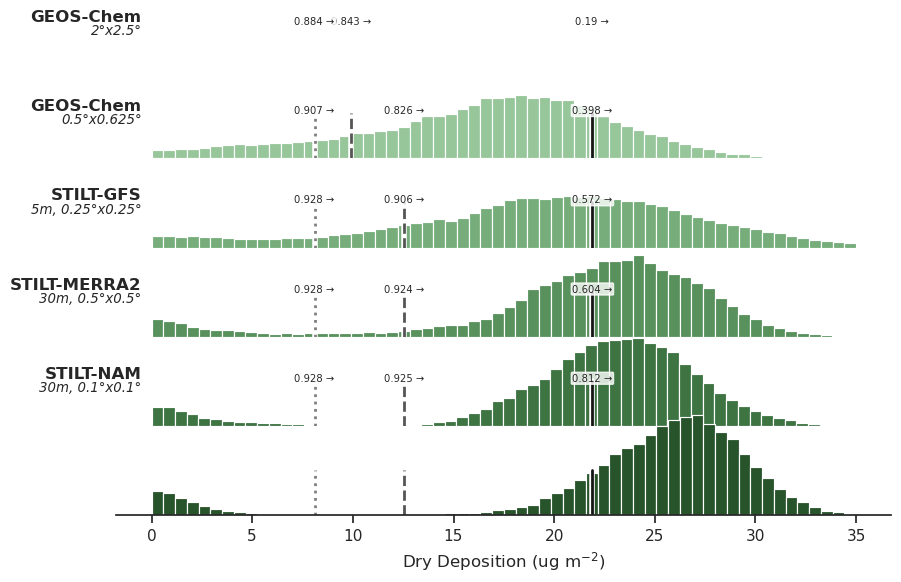

In [100]:
posterior_df = posterior_df_90.copy()

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=60)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
    if i == 0:
        for m in prior_flux:
            pctile = percentile_value(posterior_df,n,m,decimals=3)
            ax[i].text(m,
                       pctileheight,str(pctile)+' →',
                       fontsize=fontsize*0.6,
                       ha='center',
                       bbox=dict(facecolor="white",
                                 alpha=0.8,
                                 boxstyle="round,pad=0.1"))
            ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
            ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
            j = j+1
    else:
        for m in prior_flux_n:
            pctile = percentile_value(posterior_df,n,m,decimals=3)
            ax[i].text(m,
                       pctileheight,str(pctile)+' →',
                       fontsize=fontsize*0.6,
                       ha='center',
                       bbox=dict(facecolor="white",
                                 alpha=0.8,
                                 boxstyle="round,pad=0.1"))
            ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
            ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
            j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.15)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

#plt.savefig(figpath+'HarvardForest_90th_fig.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS18a.'+figformat,dpi=dpi,transparent=True)
plt.show()
plt.close()


In [101]:
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','GEOS-Chem','STILT-GFS','STILT-MERRA2','STILT-NAM']
model_subnames = ['2°x2.5°','0.5°x0.625°','5m, 0.25°x0.25°','30m, 0.5°x0.5°','30m, 0.1°x0.1°']

#figure parameters
textloc=-0.5
fontspace=950
textheight=3000
x_label='Dry Deposition (ug m$^{-2}$)'

#colors
pal = sns.cubehelix_palette(6,start=1.95, rot=0,light=0.7)#sns.cubehelix_palette(10, rot=-.25, light=.7)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [21.9,9.894,8.1]#,period_litterfall] #calculated Obrist growing season uptake: 19.775
prior_flux_n = [21.9,12.556,8.1] #calculated Obrist growing season uptake: 19.775
prior_clrs = [gry[10],gry[7],gry[5]]#,gry[3]]
prior_style = ['-','--',':']#,':']

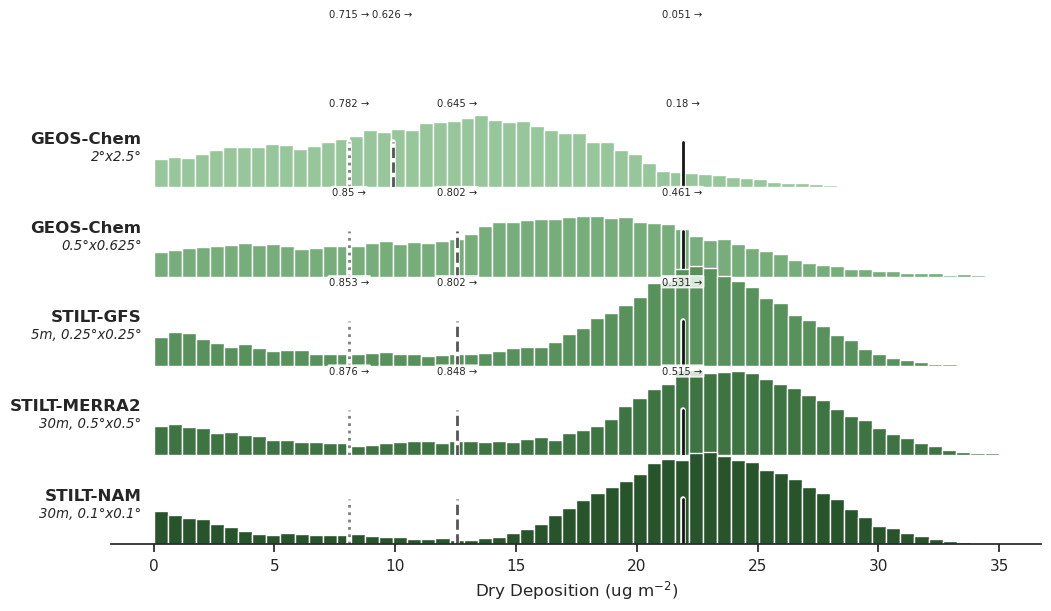

In [102]:
posterior_df = posterior_df_50.copy()

fig,ax=plt.subplots(5,1,figsize=(12,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=60)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
    if i == 0:
        for m in prior_flux:
            pctile = percentile_value(posterior_df,n,m,decimals=3)
            ax[i].text(m,
                       pctileheight,str(pctile)+' →',
                       fontsize=fontsize*0.6,
                       ha='center',
                       bbox=dict(facecolor="white",
                                 alpha=0.8,
                                 boxstyle="round,pad=0.1"))
            ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
            ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
            j = j+1
    else:
        for m in prior_flux_n:
            pctile = percentile_value(posterior_df,n,m,decimals=3)
            ax[i].text(m,
                       pctileheight,str(pctile)+' →',
                       fontsize=fontsize*0.6,
                       ha='center',
                       bbox=dict(facecolor="white",
                                 alpha=0.8,
                                 boxstyle="round,pad=0.1"))
            ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
            ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
            j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.15)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

#plt.savefig(figpath+'HarvardForest_IQR_fig.'+figformat,dpi=dpi,transparent=True)
plt.savefig(figpath+'FigS18b.'+figformat,dpi=dpi,transparent=True)
plt.show()
plt.close()


**Figures S19 and S20** - ATARS posterior distributions for 90th pctile range (2014 and 2015) and IQR (2014 and 2015)

In [103]:
#read in Gunn Point posteriors
cols = ['gc','gc_n','merra2_gfed','gdas_gfed','merra2_finn','gdas_finn']

posterior_df_90 = pd.read_csv('../posteriors/GunnPoint_posterior_2014_90th.csv',usecols=cols)
posterior_df_50 = pd.read_csv('../posteriors/GunnPoint_posterior_2014_IQR.csv',usecols=cols)

priors = pd.read_csv('../posteriors/GunnPoint_priors_2014.csv')

In [104]:
#to make this plot the way I want it, need to make function to add column with percentile
def percentile_value(df,run,value,decimals=3):
    return np.round((df[run]>value).sum()/len(df[run]),decimals)
    #return (sorted(df[df['variable']==run]['posterior'])>value).sum()/len(df[df['variable']==run]['posterior'])


In [105]:
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','GEOS-Chem','STILT-MERRA2-GFED4s','STILT-MERRA2-FINN1.5','STILT-GDAS-GFED4s','STILT-GDAS-FINN1.5']
model_subnames = ['2°x2.5°','0.5°x0.625°','5m, 0.5°x0.5°','5m, 0.5°x0.5°','5m, 0.5°x0.5°','5m, 0.5°x0.5°']

#figure parameters
textheight=7500
textloc=-1
fontsize=12
fontspace=2000
priorheight=0.33
priorlinewidth=2
pctileheight=5500
x_label='Biomass Burning (Mg)'

#colors
pal = sns.color_palette("flare",10)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors['GFED4s'].values[0],priors['FINN1p5'].values[0]]#,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

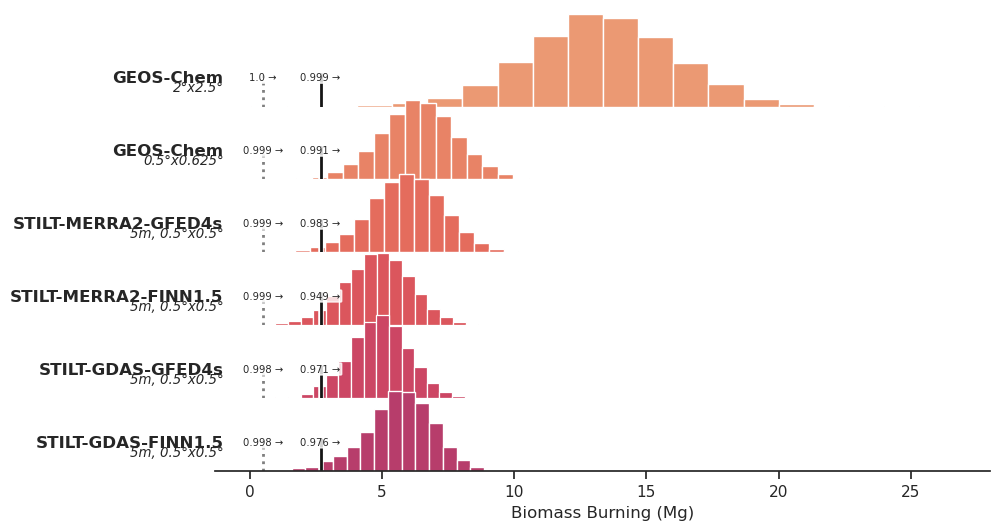

In [106]:
#receptor filt = off
posterior_df = posterior_df_90.copy()

fig,ax=plt.subplots(6,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.25)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(bottom=True,left=True,ax=ax[4])
sns.despine(left=True,ax=ax[5])

#plt.savefig(figpath+'GunnPoint_90th_2014_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.savefig(figpath+'FigS19a.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.show()
plt.close()


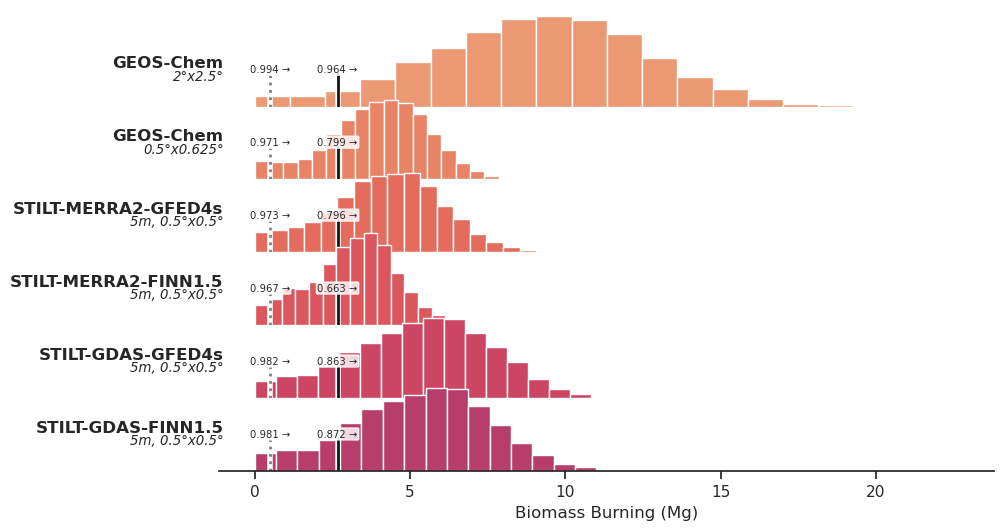

In [107]:
#receptor filt = off
posterior_df = posterior_df_50.copy()

fig,ax=plt.subplots(6,1,figsize=(10,6),sharex=True,sharey=True)

pctileheight=5000
fontspace=2000


i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.25)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(bottom=True,left=True,ax=ax[4])
sns.despine(left=True,ax=ax[5])

#plt.savefig(figpath+'GunnPoint_IQR_2014_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.savefig(figpath+'FigS20a.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")

plt.show()
plt.close()


In [108]:
#read in Harvard Forest posteriors
cols = ['gc','gc_n','merra2_gfed','gdas_gfed','merra2_finn','gdas_finn']

posterior_df_90 = pd.read_csv('../posteriors/GunnPoint_posterior_2015_90th.csv',usecols=cols)
posterior_df_50 = pd.read_csv('../posteriors/GunnPoint_posterior_2015_IQR.csv',usecols=cols)

priors = pd.read_csv('../posteriors/GunnPoint_priors_2015.csv')

In [109]:
#to make this plot the way I want it, need to make function to add column with percentile
def percentile_value(df,run,value,decimals=3):
    return np.round((df[run]>value).sum()/len(df[run]),decimals)
    #return (sorted(df[df['variable']==run]['posterior'])>value).sum()/len(df[df['variable']==run]['posterior'])


In [110]:
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','GEOS-Chem','STILT-MERRA2-GFED4s','STILT-MERRA2-FINN1.5','STILT-GDAS-GFED4s','STILT-GDAS-FINN1.5']
model_subnames = ['2°x2.5°','0.5°x0.625°','5m, 0.5°x0.5°','5m, 0.5°x0.5°','5m, 0.5°x0.5°','5m, 0.5°x0.5°']

#figure parameters
textheight=4000
textloc=1
fontsize=12
fontspace=1500
priorheight=0.45
priorlinewidth=2
pctileheight=2700
x_label='Biomass Burning (Mg)'

#colors
pal = sns.color_palette("flare",10)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors['GFED4s'].values[0],priors['FINN1p5'].values[0]]#,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

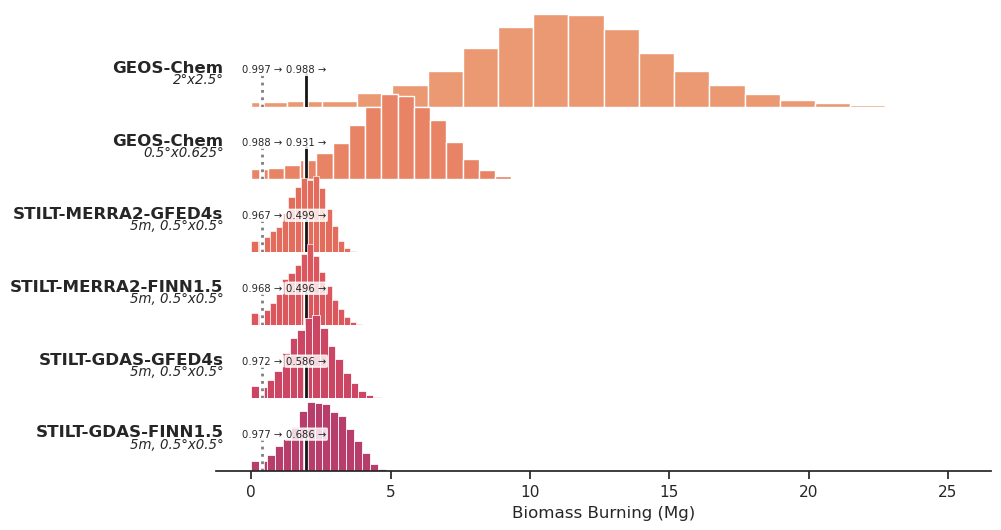

In [111]:
#figure parameters
textheight=7500
textloc=-1
fontsize=12
fontspace=2000
priorheight=0.33
priorlinewidth=2
pctileheight=5500

posterior_df = posterior_df_90.copy()

fig,ax=plt.subplots(6,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.25)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(bottom=True,left=True,ax=ax[4])
sns.despine(left=True,ax=ax[5])

#plt.savefig(figpath+'GunnPoint_90th_2015_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.savefig(figpath+'FigS19b.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.show()
plt.close()


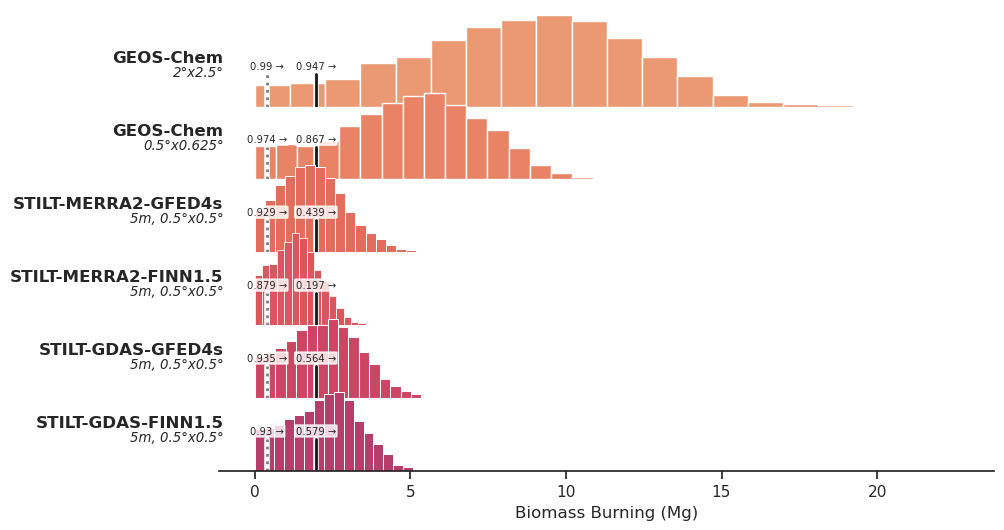

In [112]:
#receptor filt = off
posterior_df = posterior_df_50.copy()

fig,ax=plt.subplots(6,1,figsize=(10,6),sharex=True,sharey=True)

pctileheight=5000

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.25)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(bottom=True,left=True,ax=ax[4])
sns.despine(left=True,ax=ax[5])

#plt.savefig(figpath+'GunnPoint_IQR_2015_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.savefig(figpath+'FigS20b.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.show()
plt.close()


**Figure S21** - CHC posterior distributions for 90th pctile range (all regions, mdd)

In [113]:
#read in Harvard Forest posteriors
cols = ['mdd','apu','are','npun','spun']

gc_90 = pd.read_csv('../posteriors/Chacaltaya_gcbase_90th.csv',usecols=cols)
merragma_90 = pd.read_csv('../posteriors/Chacaltaya_merragma_90th.csv',usecols=cols)
gdasgma_90 = pd.read_csv('../posteriors/Chacaltaya_gdasgma_90th.csv',usecols=cols)
merraed10_90 = pd.read_csv('../posteriors/Chacaltaya_merraed10_90th.csv',usecols=cols)
gdased10_90 = pd.read_csv('../posteriors/Chacaltaya_gdased10_90th.csv',usecols=cols)

#read priors
priors = pd.read_csv('../posteriors/Chacaltaya_priors.csv')

In [114]:
dflist =   [gc_90,merragma_90,gdasgma_90,merraed10_90,gdased10_90]
namelist = ['gc','merragma','gdasgma','merraed10','gdased10']

mdd = loc_compile(dflist,namelist,loc='mdd')
apu = loc_compile(dflist,namelist,loc='apu')
are = loc_compile(dflist,namelist,loc='are')
npun = loc_compile(dflist,namelist,loc='npun')
spun = loc_compile(dflist,namelist,loc='spun')
allregions = spun+npun+are+apu+mdd


In [115]:
#all regions
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','STILT-MERRA2-GMA','STILT-GDAS-GMA','STILT-MERRA2-ED10','STILT-GDAS-ED10']
model_subnames = ['2°x2.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°']

#figure parameters
textheight=7500
textloc=3 #-22
fontsize=12
fontspace=2000
priorheight=0.45
priorlinewidth=2
pctileheight=7500
x_label='ASGM Emissions (Mg)'

#colors
pal = sns.color_palette("blend:#FDEBBA,#DEA81D",6)#sns.cubehelix_palette(6,start=1.35, rot=0,light=0.7)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors['gc'].sum(),priors['ed10'].sum()]#,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

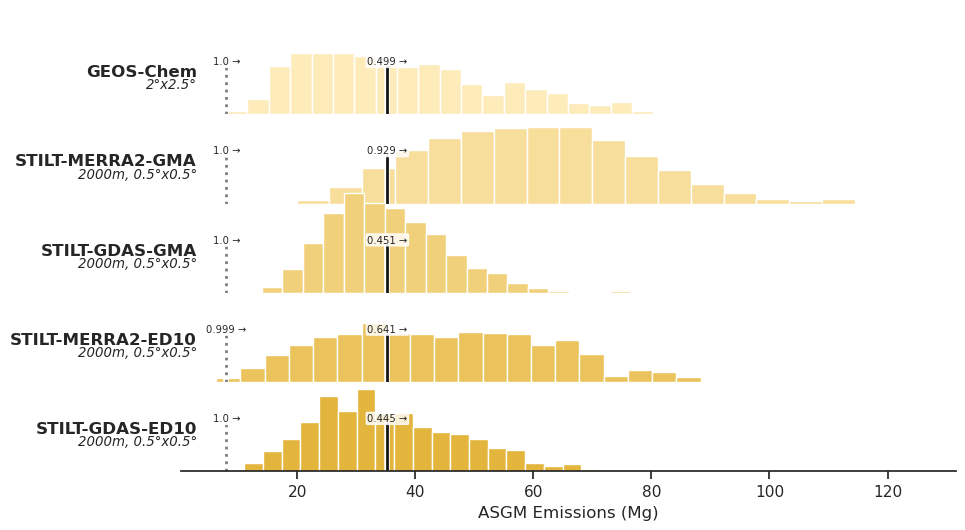

In [116]:
posterior_df = allregions.copy()

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
 
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.15)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

#plt.savefig(figpath+'Chacaltaya_allregions_90th_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.savefig(figpath+'FigS21a.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")

plt.show()
plt.close()


In [117]:
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','STILT-MERRA2-GMA','STILT-GDAS-GMA','STILT-MERRA2-ED10','STILT-GDAS-ED10']
model_subnames = ['2°x2.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°']

#figure parameters
textheight=10000
textloc=-2 #-22
fontsize=12
fontspace=3000
priorheight=0.45
priorlinewidth=2
pctileheight=10000
x_label='ASGM Emissions (Mg)'

#colors
pal = sns.color_palette("blend:#FDEBBA,#DEA81D",6)#sns.cubehelix_palette(6,start=1.35, rot=0,light=0.7)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors[priors['regions']=='mdd']['gc'].values[0]]#,priors[priors['regions']=='mdd']['ed10'].sum()]#,period_litterfall]
prior_clrs = [gry[10]]#,gry[5]]#,gry[3]]
prior_style = ['-']#,':']#,':']

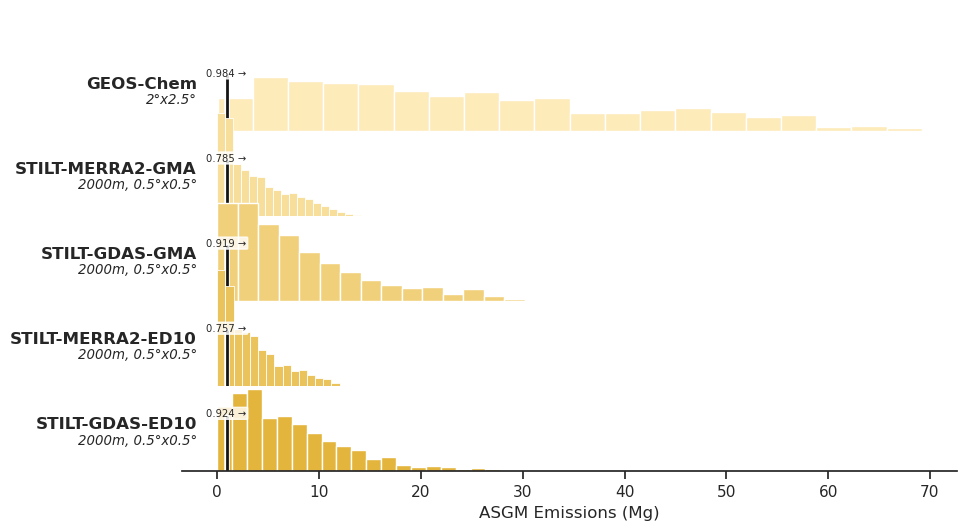

In [118]:
posterior_df = mdd.copy()

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
 
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.3)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

#plt.savefig(figpath+'Chacaltaya_mdd_90th_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')
plt.savefig(figpath+'FigS21b.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")

plt.show()
plt.close()


**Figure S22** - CHC posterior distributions for IQR (all regions, mdd)

In [119]:
#read in Harvard Forest posteriors
cols = ['mdd','apu','are','npun','spun']

gc_50 = pd.read_csv('../posteriors/Chacaltaya_gcbase_IQR.csv',usecols=cols)
merragma_50 = pd.read_csv('../posteriors/Chacaltaya_merragma_IQR.csv',usecols=cols)
gdasgma_50 = pd.read_csv('../posteriors/Chacaltaya_gdasgma_IQR.csv',usecols=cols)
merraed10_50 = pd.read_csv('../posteriors/Chacaltaya_merraed10_IQR.csv',usecols=cols)
gdased10_50 = pd.read_csv('../posteriors/Chacaltaya_gdased10_IQR.csv',usecols=cols)

#read priors
priors = pd.read_csv('../posteriors/Chacaltaya_priors.csv')

In [120]:
dflist =   [gc_50,merragma_50,gdasgma_50,merraed10_50,gdased10_50]
namelist = ['gc','merragma','gdasgma','merraed10','gdased10']

mdd = loc_compile(dflist,namelist,loc='mdd')
apu = loc_compile(dflist,namelist,loc='apu')
are = loc_compile(dflist,namelist,loc='are')
npun = loc_compile(dflist,namelist,loc='npun')
spun = loc_compile(dflist,namelist,loc='spun')
allregions = spun+npun+are+apu+mdd


In [121]:
#all regions
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','STILT-MERRA2-GMA','STILT-GDAS-GMA','STILT-MERRA2-ED10','STILT-GDAS-ED10']
model_subnames = ['2°x2.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°']

#figure parameters
textheight=7500
textloc=3 #-22
fontsize=12
fontspace=2000
priorheight=0.45
priorlinewidth=2
pctileheight=7500
x_label='ASGM Emissions (Mg)'

#colors
pal = sns.color_palette("blend:#FDEBBA,#DEA81D",6)#sns.cubehelix_palette(6,start=1.35, rot=0,light=0.7)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors['gc'].sum(),priors['ed10'].sum()]#,period_litterfall]
prior_clrs = [gry[10],gry[5]]#,gry[3]]
prior_style = ['-',':']#,':']

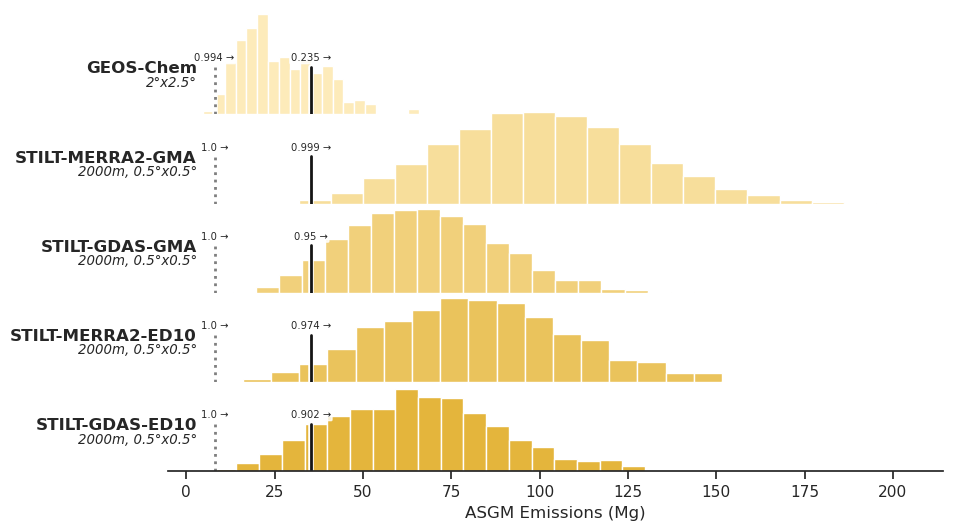

In [122]:
posterior_df = allregions.copy()

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
 
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.15)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

#plt.savefig(figpath+'Chacaltaya_allregions_IQR_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.savefig(figpath+'FigS22a.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.show()
plt.close()


In [123]:
#all regions
sns.set_theme(style='white',rc={"axes.facecolor": (0, 0, 0, 0),'xtick.bottom': True})

model_names = ['GEOS-Chem','STILT-MERRA2-GMA','STILT-GDAS-GMA','STILT-MERRA2-ED10','STILT-GDAS-ED10']
model_subnames = ['2°x2.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°','2000m, 0.5°x0.5°']

#figure parameters
textheight=13000
textloc=-2 #-22
fontsize=12
fontspace=3500
priorheight=0.43
priorlinewidth=2
pctileheight=11000
x_label='ASGM Emissions (Mg)'

#colors
pal = sns.color_palette("blend:#FDEBBA,#DEA81D",6)#sns.cubehelix_palette(6,start=1.35, rot=0,light=0.7)
gry = sns.color_palette('binary',11)

#prior information
prior_flux = [priors[priors['regions']=='mdd']['gc'].values[0]]#,priors[priors['regions']=='mdd']['ed10'].sum()]#,period_litterfall]
prior_clrs = [gry[10]]#,gry[5]]#,gry[3]]
prior_style = ['-']#,':']#,':']

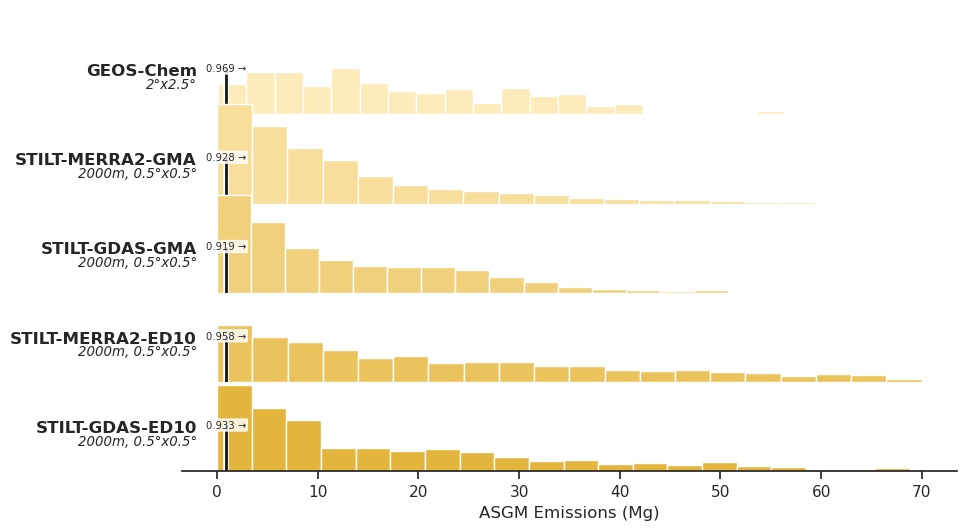

In [124]:
posterior_df = mdd.copy()

fig,ax=plt.subplots(5,1,figsize=(10,6),sharex=True,sharey=True)

i = 0
for n in posterior_df:
    sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=True,color=pal[i],alpha=1,bins=20)
    #sns.histplot(data=posterior_df,x=n,ax=ax[i],fill=False,color='white',alpha=1,lw=0.5)

    ax[i].tick_params(labelleft=False)
    ax[i].set_ylabel('')
    
    ax[i].text(textloc,textheight,model_names[i], fontsize=fontsize,ha='right',va='top',weight='semibold')
    ax[i].text(textloc,textheight-fontspace,model_subnames[i], fontsize=fontsize-(fontsize*0.2),ha='right',va='top',style='oblique')
    
    #adding in prior lines
    j = 0
    
 
    for m in prior_flux:
        pctile = percentile_value(posterior_df,n,m,decimals=3)
        ax[i].text(m,
                   pctileheight,str(pctile)+' →',
                   fontsize=fontsize*0.6,
                   ha='center',
                   bbox=dict(facecolor="white",
                             alpha=0.8,
                             boxstyle="round,pad=0.1"))
        ax[i].axvline(m,color='white',ymax=priorheight,linewidth=priorlinewidth*2)
        ax[i].axvline(m,color=prior_clrs[j],ymax=priorheight,linewidth=priorlinewidth,linestyle=prior_style[j])
        j = j+1
         
    if i != len(list(posterior_df))-1:
        ax[i].tick_params(labelleft=False,length=0)

    i = i+1

ax[i-1].set_xlabel(x_label)

plt.subplots_adjust(wspace=0.4, hspace=-0.15)
sns.despine(bottom=True,left=True)
sns.despine(bottom=True,left=True,ax=ax[0])
sns.despine(bottom=True,left=True,ax=ax[1])
sns.despine(bottom=True,left=True,ax=ax[2])
sns.despine(bottom=True,left=True,ax=ax[3])
sns.despine(left=True,ax=ax[4])

#plt.savefig(figpath+'Chacaltaya_mdd_IQR_fig.'+figformat,dpi=dpi,transparent=True,bbox_inches='tight')
plt.savefig(figpath+'FigS22b.'+figformat,dpi=dpi,transparent=True,bbox_inches = "tight")
plt.show()
plt.close()
